### 1. Import data and libraries

In [1]:
import machine_learning_classes.authorize_api as auth
import machine_learning_classes.collect_data as cd
import pandas as pd
import configuration.load_churn_config as c
pd.options.display.max_rows

60

In [2]:
conf=c.configuration('churn_config.yaml')

gdrive = auth.authorize_api(conf.credentials_file_path, conf.clientsecret_file_path,scope=conf.SCOPE)
drive_api_service = gdrive.gdrive_authorize()

collect_data = cd.collect_data(drive_api_service, conf.filepath, conf.file_id)
df=collect_data.download_file()

print ("{} dataset has {} rows(samples) with {} columns(features) each.".format("Churn Model",*df.shape))
print(df.head(5))

Churn Model dataset has 303235 rows(samples) with 8 columns(features) each.
   POLICY_NUMBER START_DATE  START_MONTH CHURN_DATE  MEMBERS  MAX_DURATION  \
0       97662795  01-APR-16            4  01-OCT-16        1           184   
1      100915150  01-DEC-16           12  01-DEC-16        1           180   
2       99747655  01-OCT-16           10  01-MAR-17        1           180   
3       99406855  01-SEP-16            9  01-JAN-17        1           180   
4      102166525  01-JAN-17            1  01-FEB-17        2           184   

  STATE CARRIER_NAME  
0    AZ     CARRIER2  
1    OR     CARRIER1  
2    NC     CARRIER3  
3    AK     CARRIER3  
4    AZ     CARRIER2  


In [0]:
self.dataframe=ltv_df.copy(deep=False)

ltv_df_filtered[["START_DATE", "CHURN_DATE"]] = ltv_df_filtered[["START_DATE", "CHURN_DATE"]].apply(pd.to_datetime)
ltv_df_filtered=ltv_df_filtered[ltv_df_filtered.START_DATE<ltv_df_filtered.CHURN_DATE]
ltv_df_filtered["MAX_BILLING_CYCLE"]=(np.ceil(((ltv_df_filtered['CHURN_DATE']-ltv_df_filtered['START_DATE']).dt.days)/30)).astype(int)
ltv_df_filtered["START_YEAR"]=ltv_df_filtered['START_DATE'].dt.year
ltv_df_filtered["CHURN_YEAR"]=ltv_df_filtered['CHURN_DATE'].dt.year
ltv_df_filtered["CHURN_MONTH"]=ltv_df_filtered['CHURN_DATE'].dt.month
ltv_df_filtered["MAX_DURATION_IN_MONTHS"]=round(ltv_df_filtered['MAX_DURATION']/30).astype(int)
ltv_df_filtered["BILLING_CYCLE_1"]=ltv_df_filtered['MEMBERS']

def billing_cycle(members,cycle,max_billing_cycle):
    if cycle <= max_billing_cycle:
        return members
    else:
        return 0

ltv_df_filtered['BILLING_CYCLE_2'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,2, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_3'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,3, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_4'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,4, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_5'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,5, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_6'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,6, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_7'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,7, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_8'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,8, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_9'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,9, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_10'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,10, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_11'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,11, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_12'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,12, x.MAX_BILLING_CYCLE), axis=1)

print(ltv_df_filtered.head(5))

   POLICY_NUMBER START_DATE  START_MONTH CHURN_DATE  MEMBERS  MAX_DURATION  \
0       97662795 2016-04-01            4 2016-10-01        1           184   
2       99747655 2016-10-01           10 2017-03-01        1           180   
3       99406855 2016-09-01            9 2017-01-01        1           180   
4      102166525 2017-01-01            1 2017-02-01        2           184   
5      104789245 2017-09-01            9 2017-11-01        1            90   

  STATE CARRIER_NAME  MAX_BILLING_CYCLE  START_YEAR  CHURN_YEAR  CHURN_MONTH  \
0    AZ     CARRIER2                  7        2016        2016           10   
2    NC     CARRIER3                  6        2016        2017            3   
3    AK     CARRIER3                  5        2016        2017            1   
4    AZ     CARRIER2                  2        2017        2017            2   
5    CA     CARRIER3                  3        2017        2017           11   

   MAX_DURATION_IN_MONTHS  BILLING_CYCLE_1  BILLIN

In [0]:
ltv_df_filtered["START_MONTH_STRING"]=ltv_df_filtered["START_DATE"].dt.month_name()
ltv_df_filtered["START_YEAR_STRING"]=ltv_df_filtered['START_DATE'].dt.year.astype(str)
display(ltv_df_filtered["START_YEAR_STRING"].head())
ltv_df_filtered["START_MONTH_STRING"].head()

0    2016
2    2016
3    2016
4    2017
5    2017
Name: START_YEAR_STRING, dtype: object

0        April
2      October
3    September
4      January
5    September
Name: START_MONTH_STRING, dtype: object

### 2. Instantiate the Exploratory Data Analysis Class

In [0]:
#Instantiate the Exploratory Data Analysis Class
#If you do not want to explore all variables, you can limit it to your choice. 
#If the last column in not your target column, specify target variable or label

eda = ed.explore(ltv_df_filtered,index_variable='POLICY_NUMBER',label='MAX_BILLING_CYCLE',include_variables=None,exclude_variables=None,date_variable='START_DATE')

#Show all the available functions in the eda class
print([ m for m in dir(eda) if not m.startswith('__')])

['bar_chart', 'bar_chart_2_variables', 'bar_chart_breakdown', 'bar_chart_independent_label', 'bar_chart_xyz', 'box_plot', 'box_plot_categorical_label', 'cat_plot_independent_label', 'categorical_variables', 'data_sample', 'dataframe', 'date_variable', 'drop_duplicate_rows', 'duplicate_value_count', 'exclude_variables', 'get_categorical_variables', 'get_numerical_variables', 'include_variables', 'index_variable', 'label', 'line_plot', 'line_plot_multiple', 'missing_value_count', 'numerical_variables', 'outliers', 'pair_plot', 'percent_bar_chart', 'percentage_barh_stacked_chart', 'plot_density', 'plot_hist', 'r2', 'reg_line_residual_independent_label', 'retention_funnel', 'scatter_plot_independent_label', 'seasonality', 'show_categorical_variable_plots', 'show_numerical_variable_plots', 'sns_heatmap', 'summary_plots', 'summary_table', 'time_series', 'time_series_feature_label', 'time_series_numerical_categorical', 'unique_value_count']


### 3. Data Summary and Validation

In [0]:
eda.duplicate_value_count()

'--------------------Duplicate Rows--------------------'

'There are no duplicates'

In [0]:
#Check sample of the data
eda.data_sample()

' dataset has 232957 rows(samples) with 27 columns(features) each.'

'--------------------Sample Dataset--------------------'

,0,2,3,4,5
POLICY_NUMBER,97662795,99747655,99406855,102166525,104789245
START_DATE,2016-04-01 00:00:00,2016-10-01 00:00:00,2016-09-01 00:00:00,2017-01-01 00:00:00,2017-09-01 00:00:00
START_MONTH,4,10,9,1,9
CHURN_DATE,2016-10-01 00:00:00,2017-03-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-11-01 00:00:00
MEMBERS,1,1,1,2,1
MAX_DURATION,184,180,180,184,90
STATE,AZ,NC,AK,AZ,CA
CARRIER_NAME,CARRIER2,CARRIER3,CARRIER3,CARRIER2,CARRIER3
MAX_BILLING_CYCLE,7,6,5,2,3
START_YEAR,2016,2016,2016,2017,2017


In [0]:
eda.summary_table()

,Null Values,% of null values,0 Values,% of 0 Values,NaN Values,% of NaN Values,count,unique,top,freq,first,last,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,max
POLICY_NUMBER,0,0.0,0,0.000000,0,0.0,232957,NaN,NaN,NaN,NaT,NaT,1.03025e+08,8.48333e+06,2.79178e+07,2.79178e+07,9.06199e+07,9.38841e+07,9.79961e+07,1.0058e+08,1.04049e+08,1.06874e+08,1.08914e+08,1.10191e+08,1.14133e+08,1.21084e+08,1.21084e+08
START_DATE,0,0.0,0,0.000000,0,0.0,232957,60,2018-08-01 00:00:00,6882,2015-01-01,2019-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START_MONTH,0,0.0,0,0.000000,0,0.0,232957,NaN,NaN,NaN,NaT,NaT,6.52489,3.43415,1,1,2,3,4,6,7,8,9,10,11,12,12
CHURN_DATE,0,0.0,0,0.000000,0,0.0,232957,61,2020-02-01 00:00:00,10901,2015-02-01,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MEMBERS,0,0.0,0,0.000000,0,0.0,232957,NaN,NaN,NaN,NaT,NaT,1.47871,0.999261,1,1,1,1,1,1,1,1,1,2,3,10,10
MAX_DURATION,0,0.0,0,0.000000,0,0.0,232957,NaN,NaN,NaN,NaT,NaT,183.375,100.944,30,30,90,90,90,180,180,180,180,184,360,1095,1095
STATE,0,0.0,0,0.000000,0,0.0,232957,47,TX,26448,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CARRIER_NAME,0,0.0,0,0.000000,0,0.0,232957,14,CARRIER3,56604,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAX_BILLING_CYCLE,0,0.0,0,0.000000,0,0.0,232957,NaN,NaN,NaN,NaT,NaT,4.59234,3.24985,1,1,2,2,3,3,4,4,6,6,7,57,57
START_YEAR,0,0.0,0,0.000000,0,0.0,232957,NaN,NaN,NaN,NaT,NaT,2016.94,1.39136,2015,2015,2015,2015,2016,2016,2017,2018,2018,2018,2019,2019,2019


'--------------------Plot Unique Value Counts and DataType for each Feature--------------------'

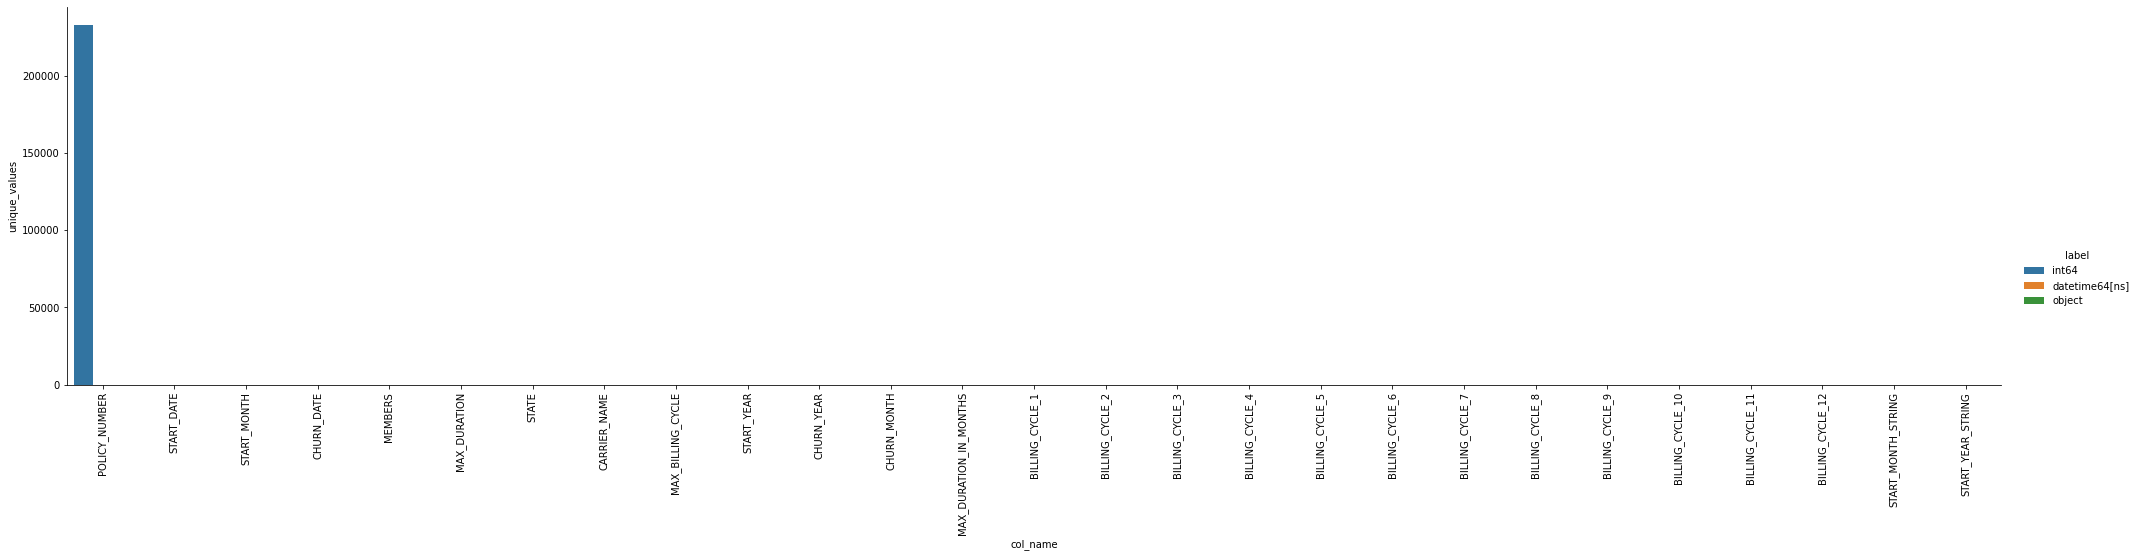

'--------------------Unique Values for each categorical feature--------------------'

Column Name: STATE : ['AZ' 'NC' 'AK' 'CA' 'VA' 'MN' 'HI' 'FL' 'PA' 'IL' 'NV' 'MD' 'TX' 'OR'
 'MO' 'OK' 'DE' 'GA' 'DC' 'IN' 'ID' 'LA' 'KS' 'MI' 'OH' 'TN' 'WI' 'CO'
 'KY' 'SC' 'UT' 'MS' 'AL' 'AR' 'NE' 'SD' 'MT' 'ME' 'CT' 'IA' 'WV' 'WA'
 'NH' 'ND' 'RI' 'WY' 'NM']
Column Name: CARRIER_NAME : ['CARRIER2' 'CARRIER3' 'CARRIER4' 'CARRIER1' 'CARRIER6' 'CARRIER11'
 'CARRIER8' 'CARRIER5' 'CARRIER10' 'CARRIER9' 'CARRIER7' 'CARRIER12'
 'CARRIER13' 'CARRIER14']
Column Name: START_MONTH_STRING : ['April' 'October' 'September' 'January' 'July' 'February' 'August'
 'March' 'June' 'November' 'December' 'May']
Column Name: START_YEAR_STRING : ['2016' '2017' '2019' '2018' '2015']


In [0]:
eda.unique_value_count()

### 4. Time series analysis

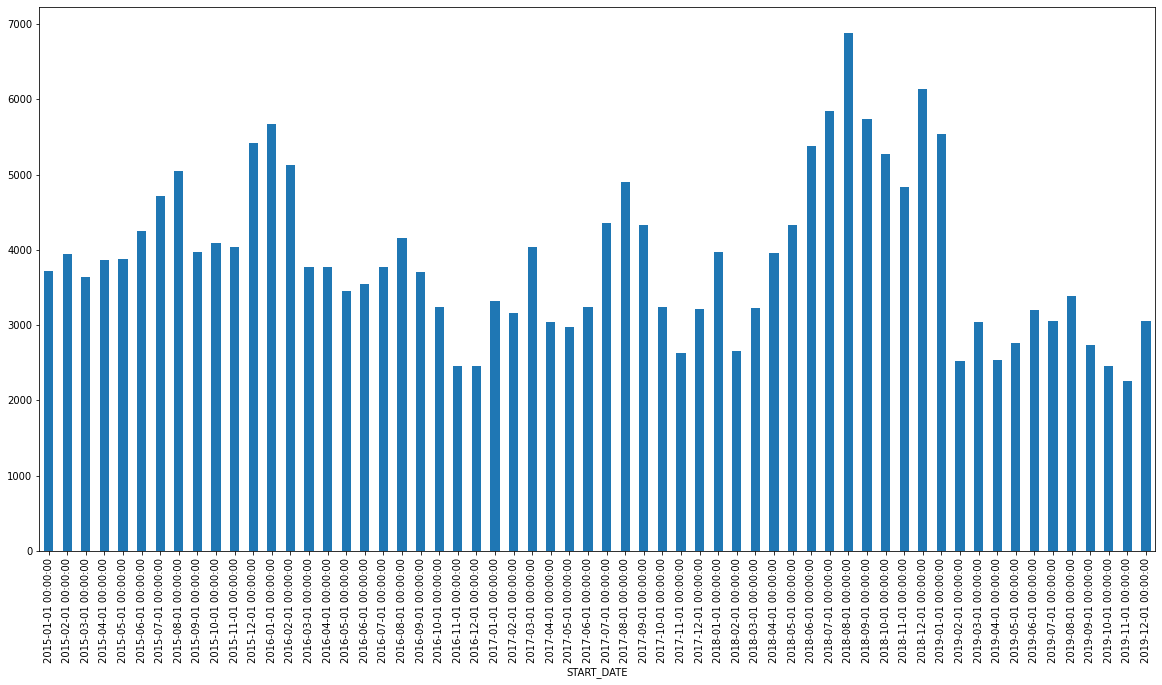

In [0]:
ltv_df_filtered.groupby(ltv_df_filtered["START_DATE"])['START_DATE'].count().plot(kind="bar")

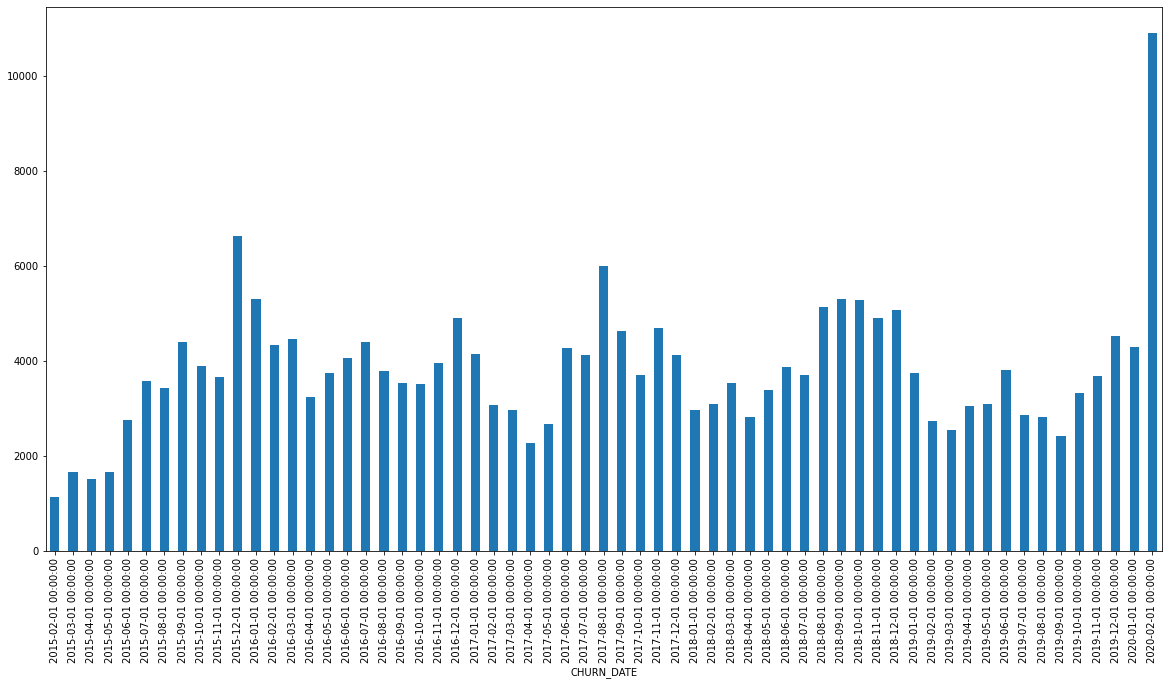

In [0]:
ltv_df_filtered.groupby(ltv_df_filtered["CHURN_DATE"])['CHURN_DATE'].count().plot(kind="bar")

Text(0.5, 1.05, 'Seasonality plot for start_date')

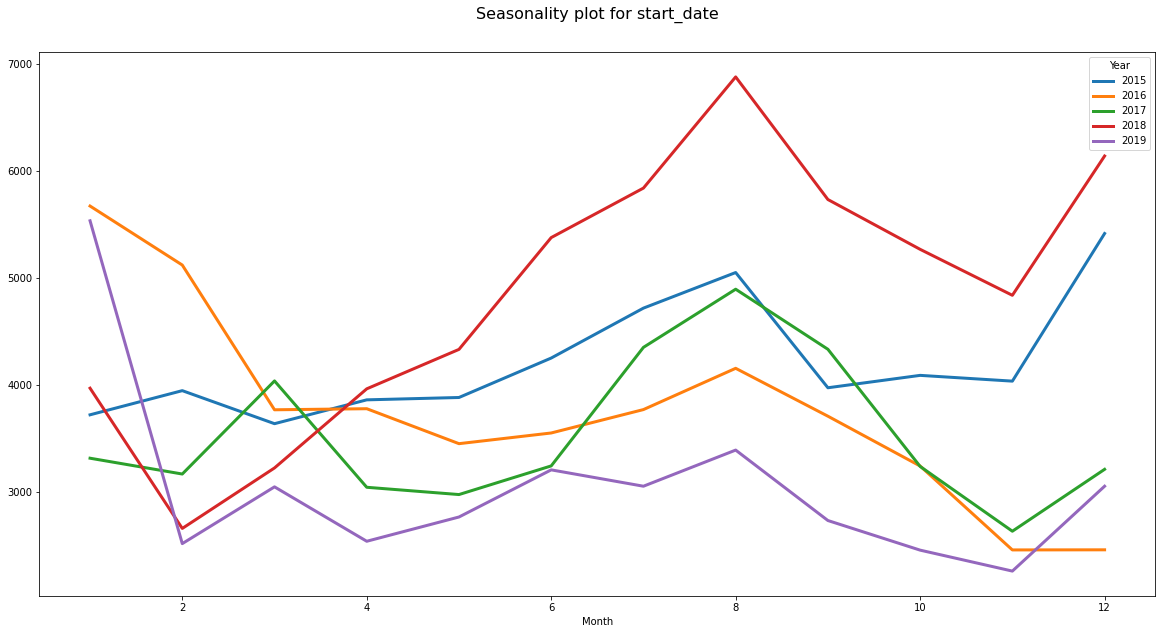

In [0]:
season = ltv_df_filtered.copy(deep=False)
season['Year'] = season['START_DATE'].dt.year
season['Month'] = season['START_DATE'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values='START_DATE',  aggfunc='count', fill_value=0)
spivot.plot(linewidth=3)
plt.title('Seasonality plot for start_date',size=16, y=1.05)
plt.show()

Text(0.5, 1.05, 'Seasonality plot for churn_date')

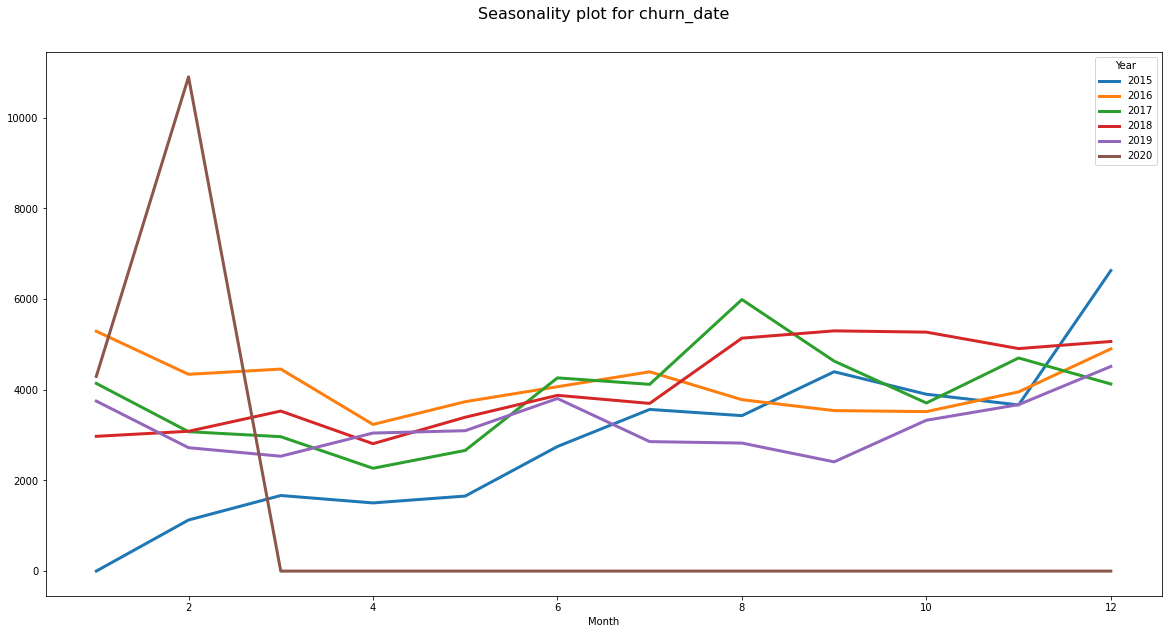

In [0]:
season = ltv_df_filtered.copy(deep=False)
season['Year'] = season['CHURN_DATE'].dt.year
season['Month'] = season['CHURN_DATE'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values='CHURN_DATE',  aggfunc='count', fill_value=0)
spivot.plot(linewidth=3)
plt.title('Seasonality plot for churn_date',size=16, y=1.05)
plt.show()

### 5. Distribution and correlation of independent features and target 

**--------------------Histograms of each Feature--------------------**

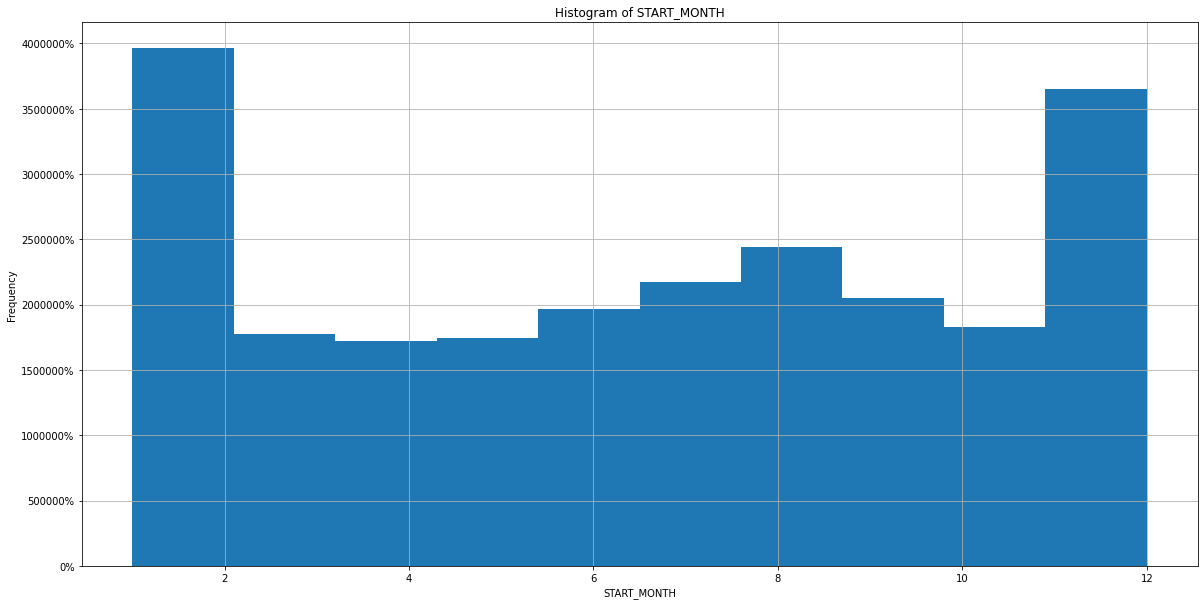

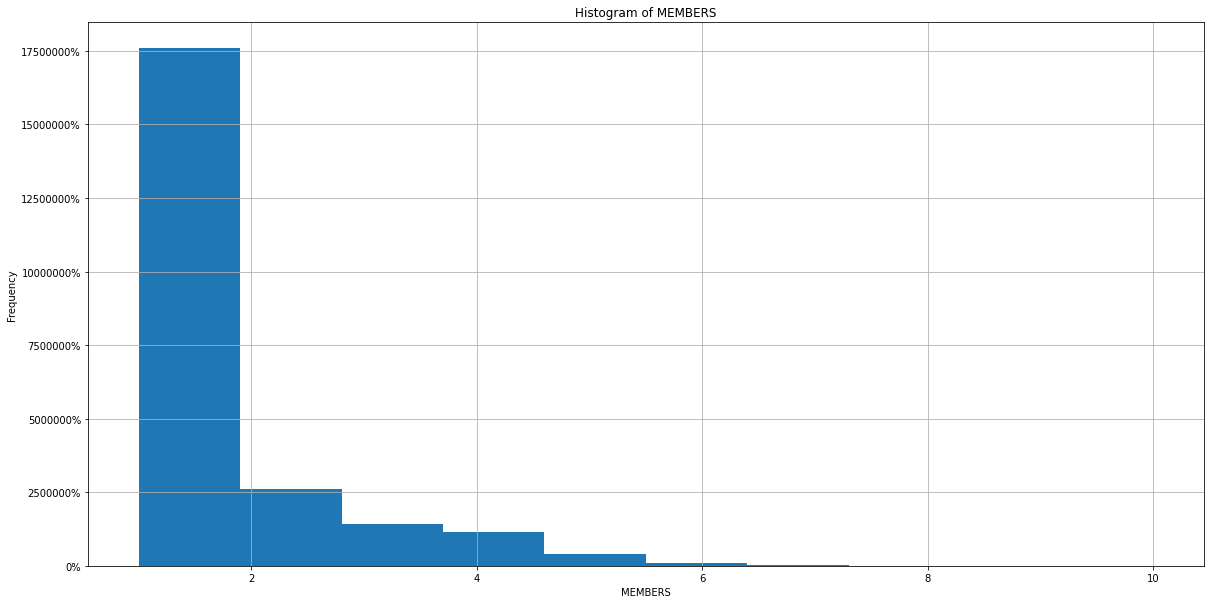

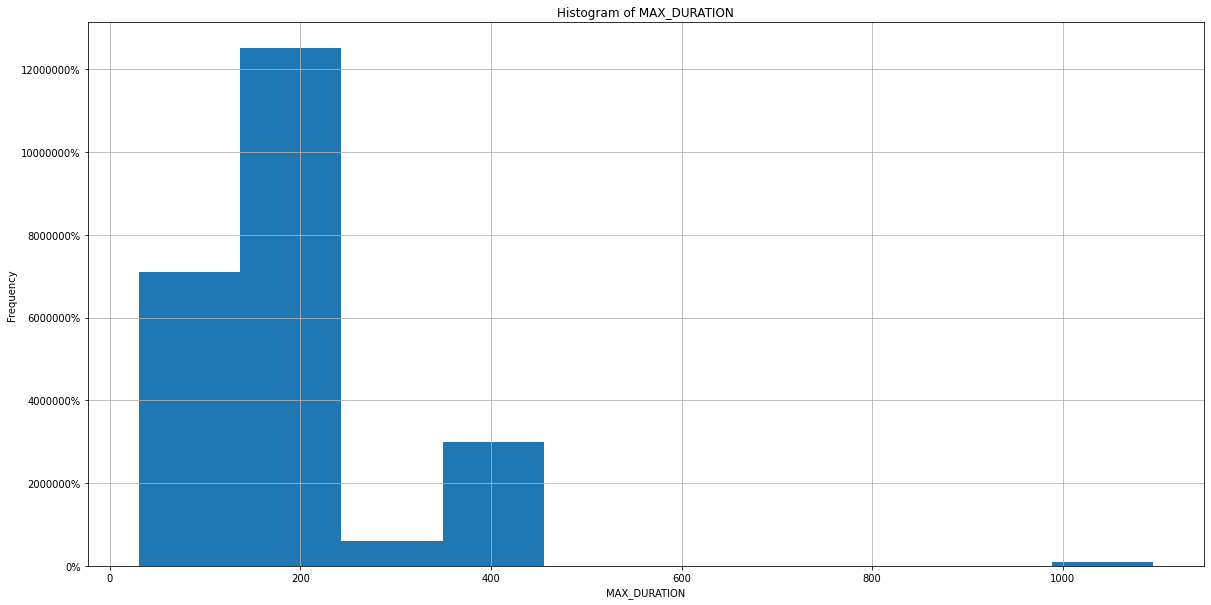

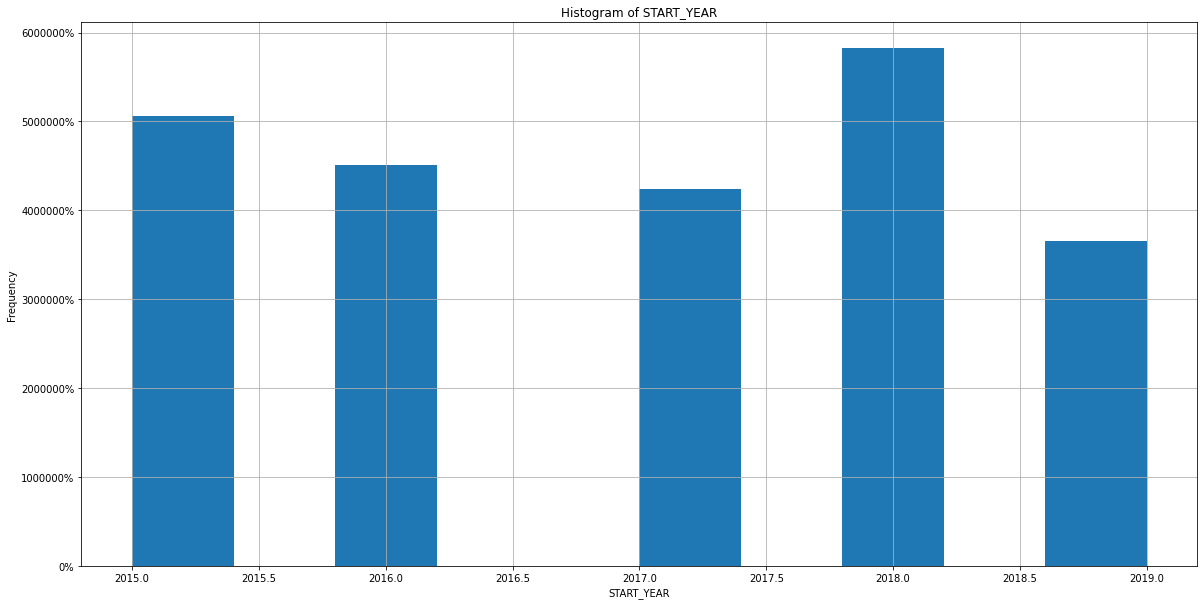

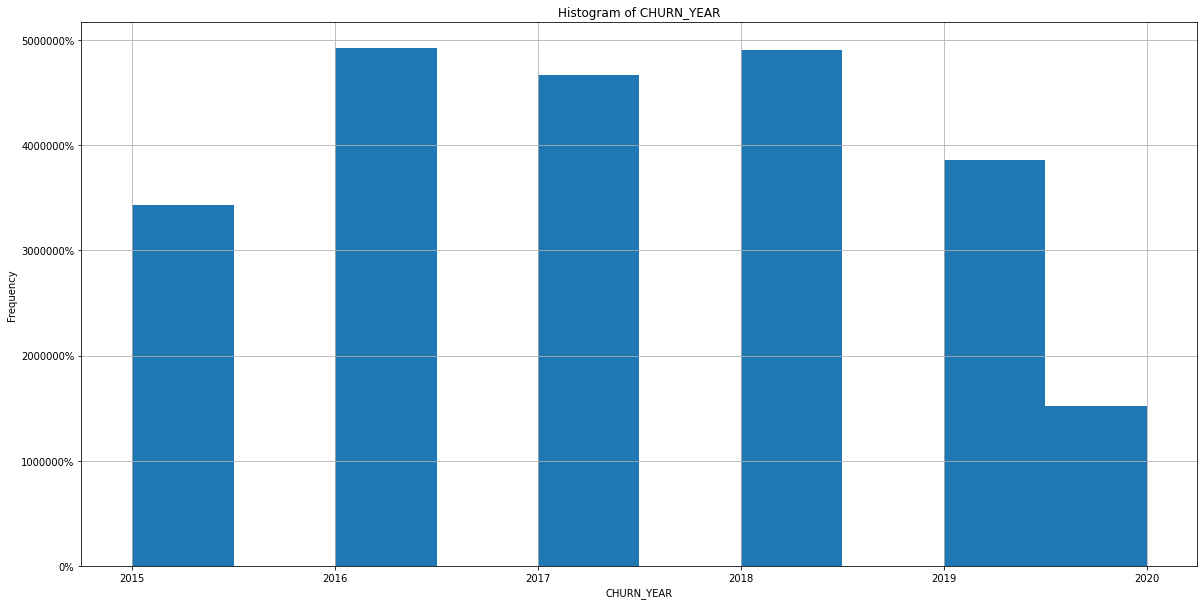

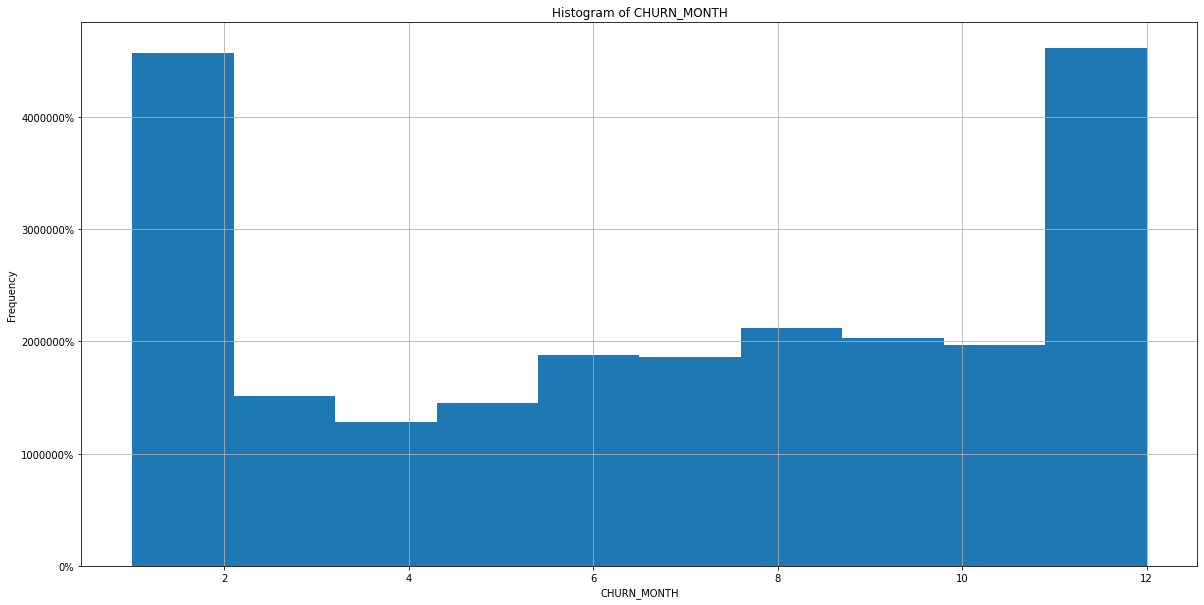

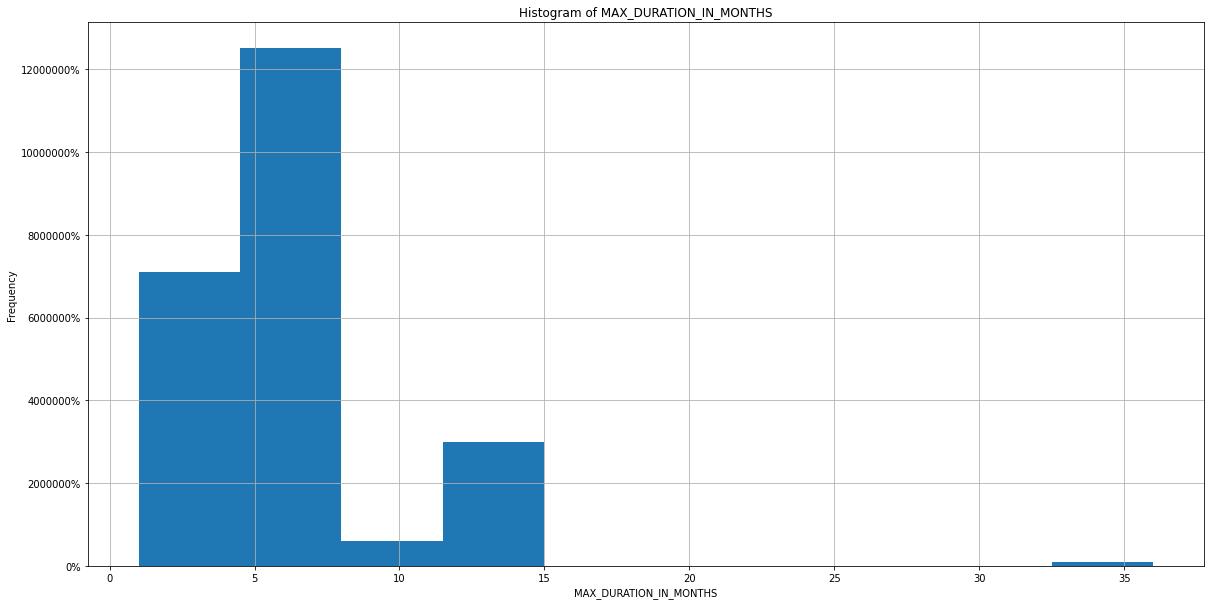

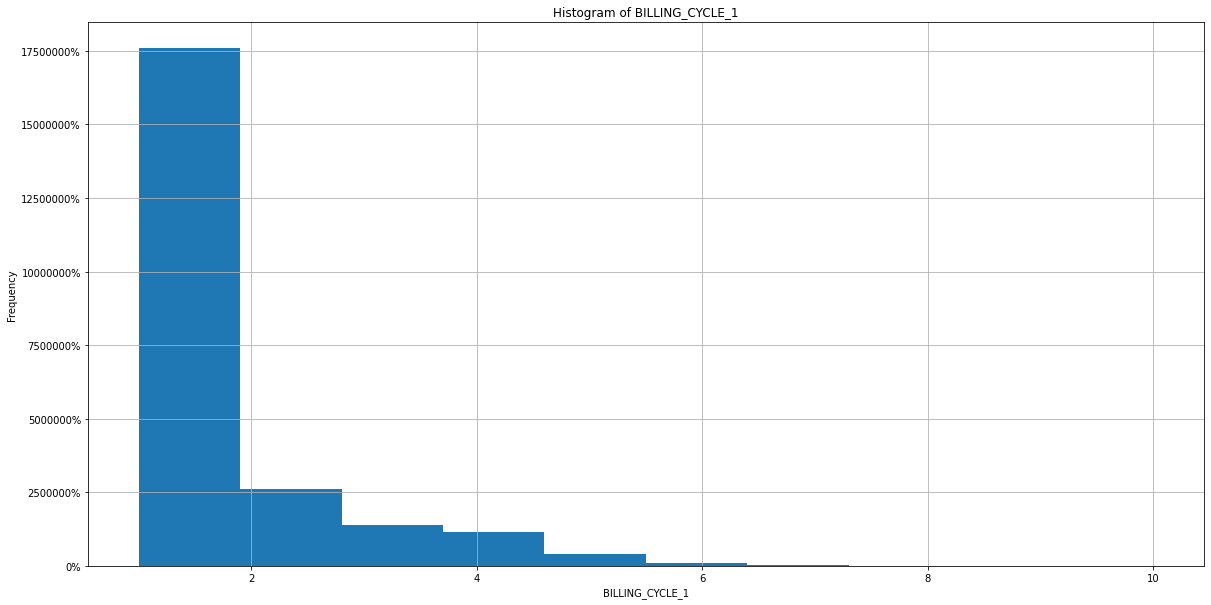

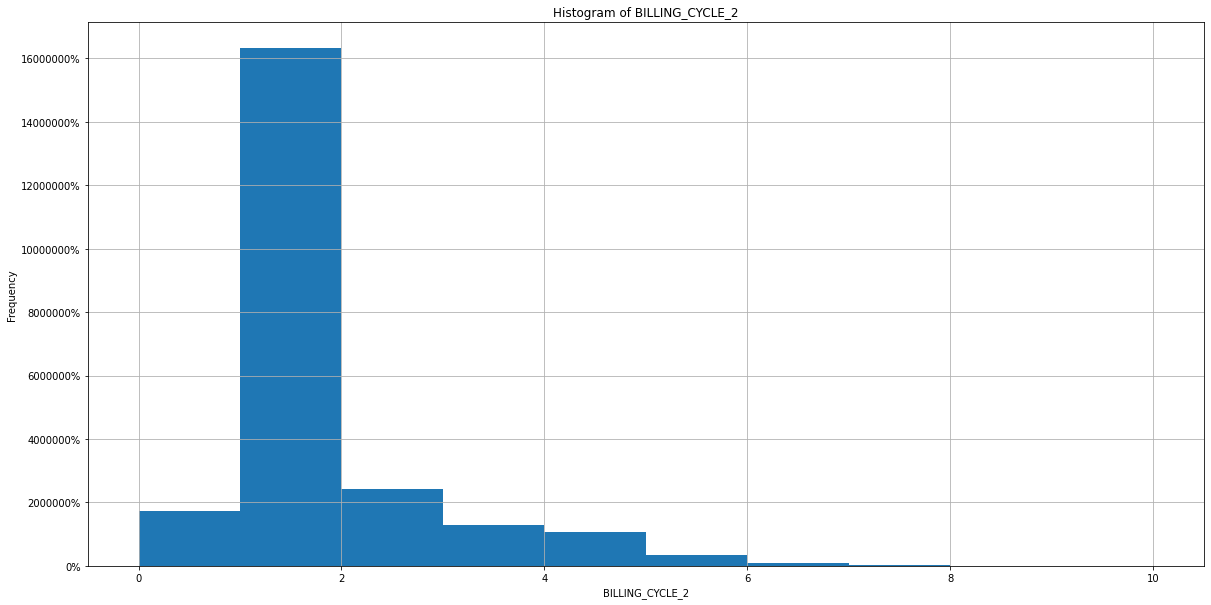

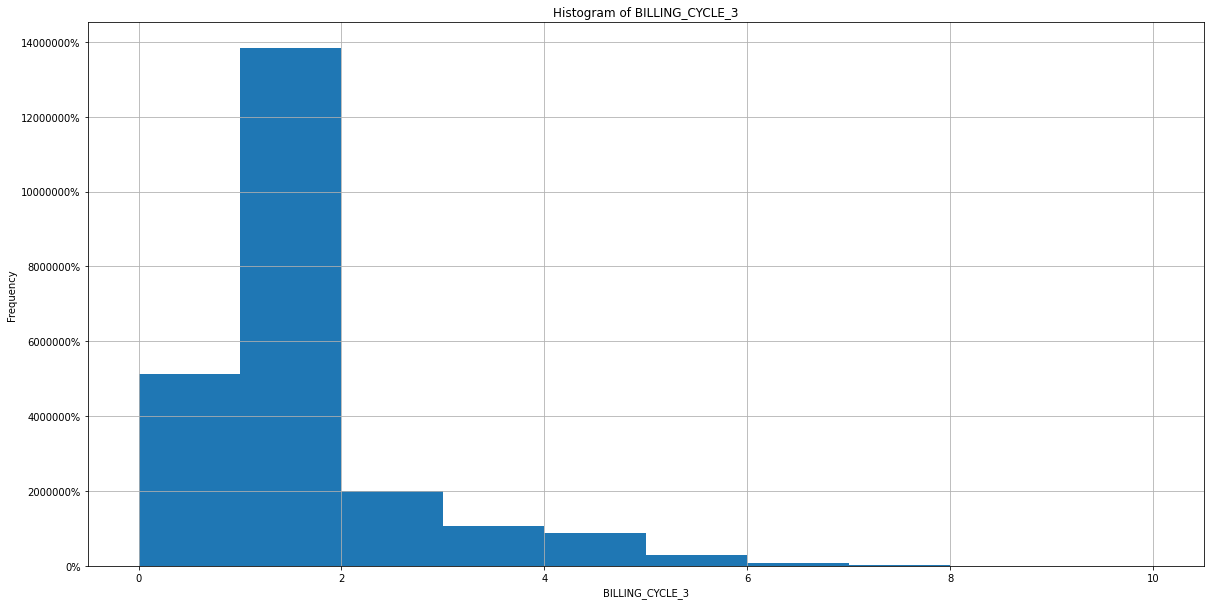

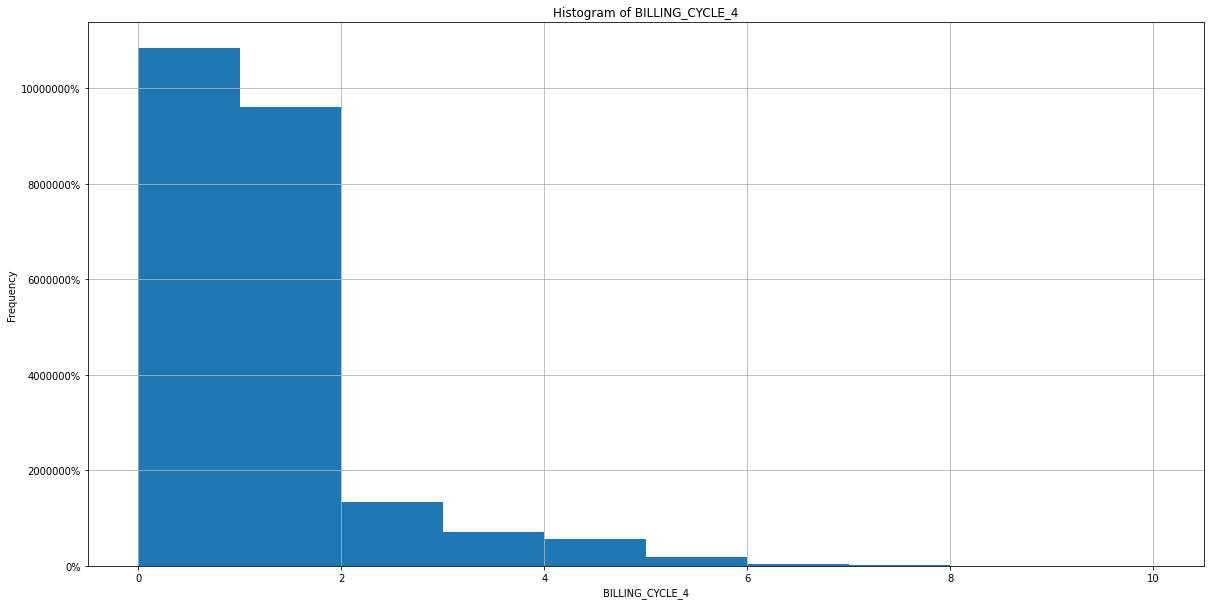

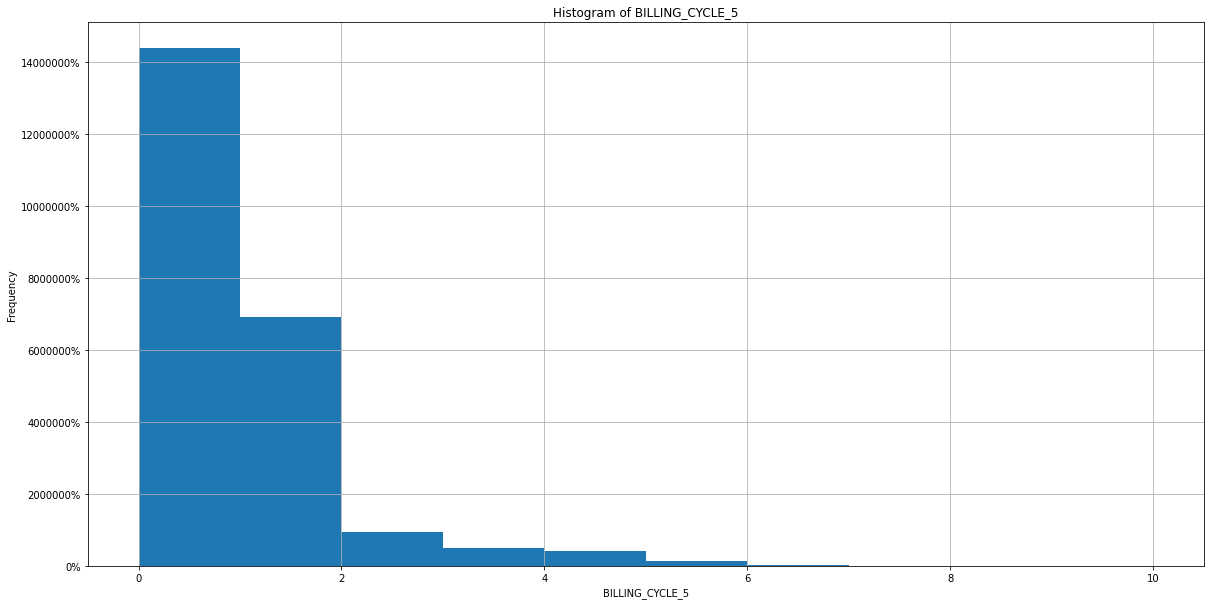

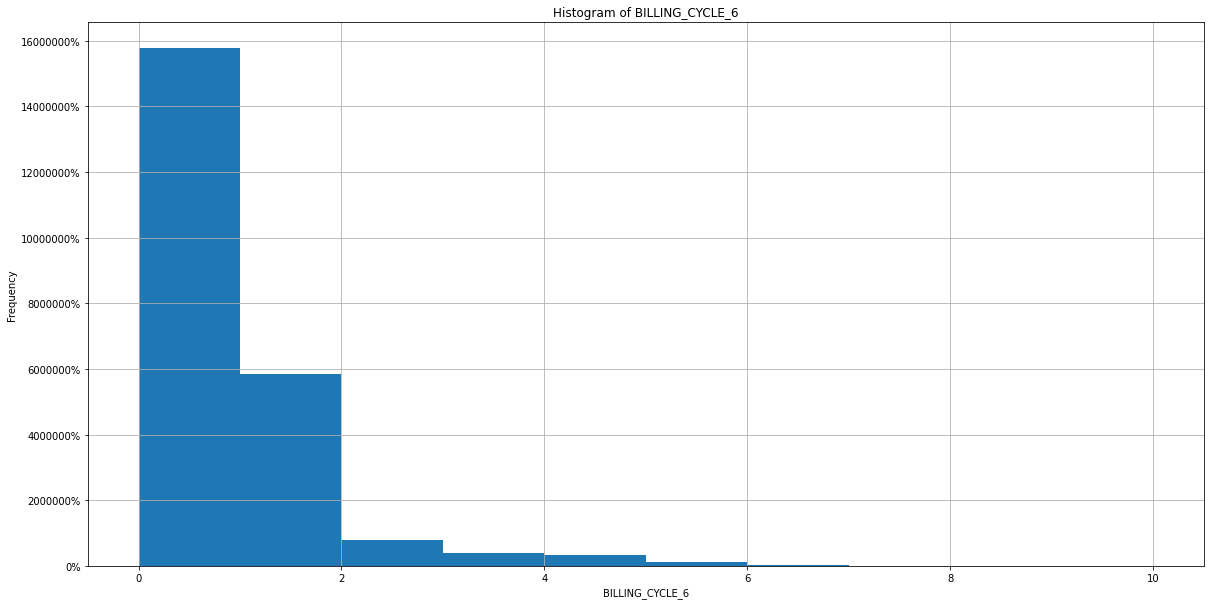

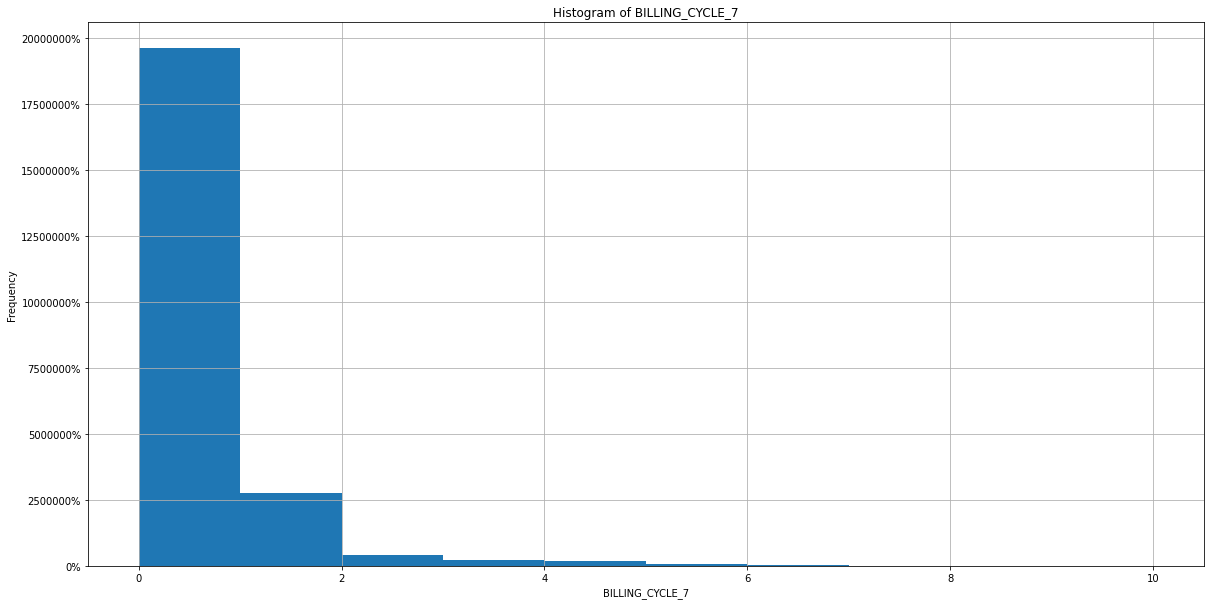

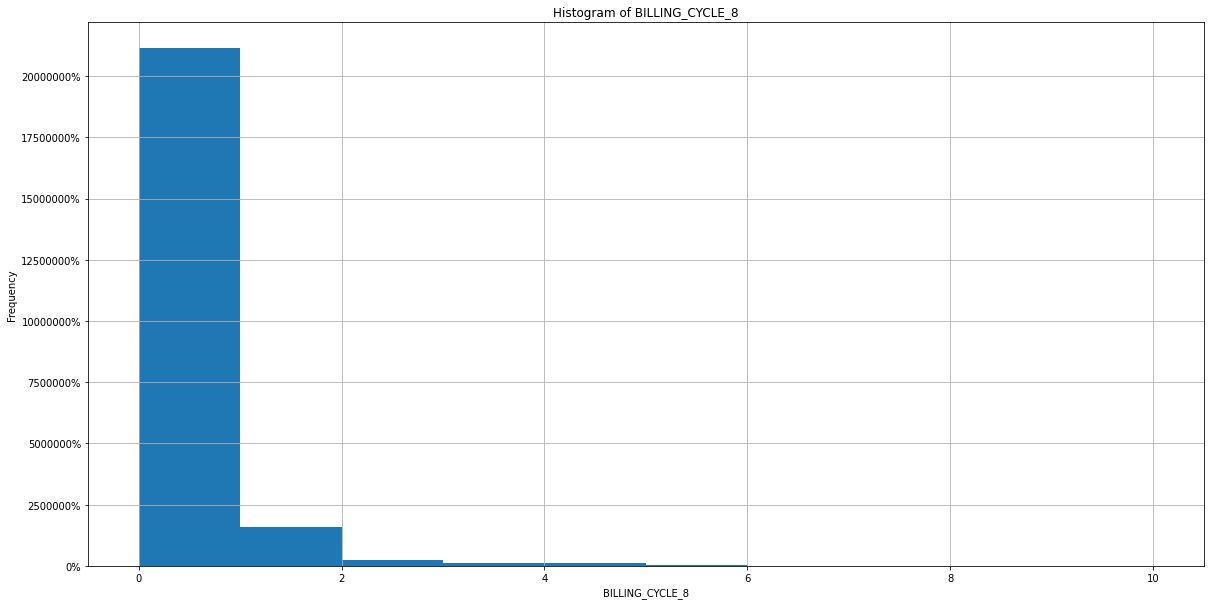

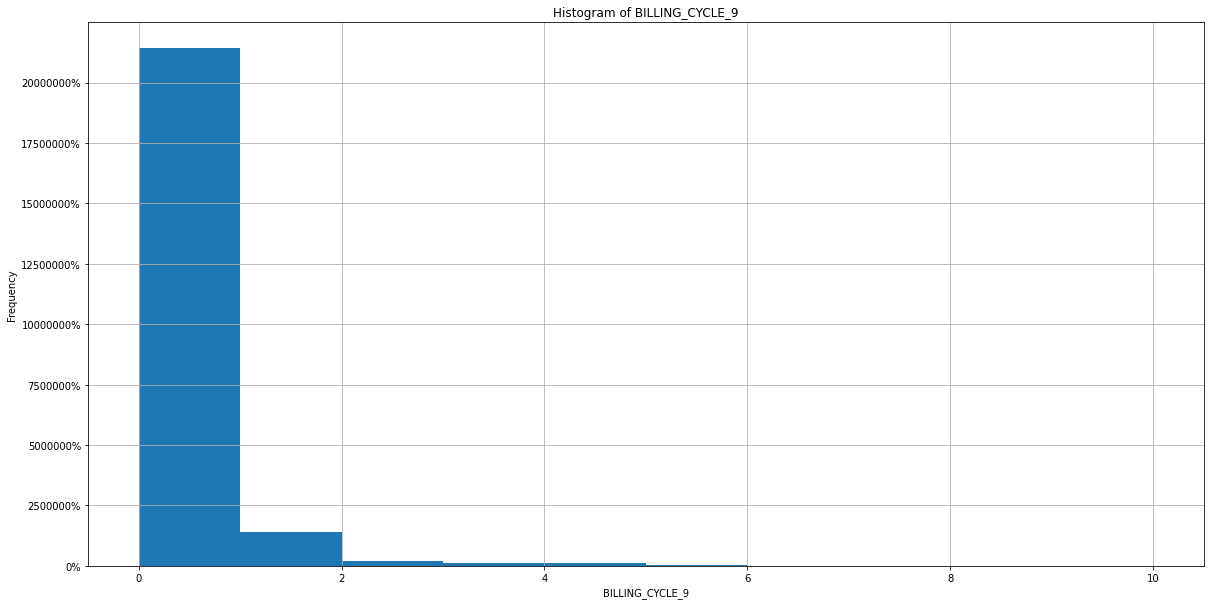

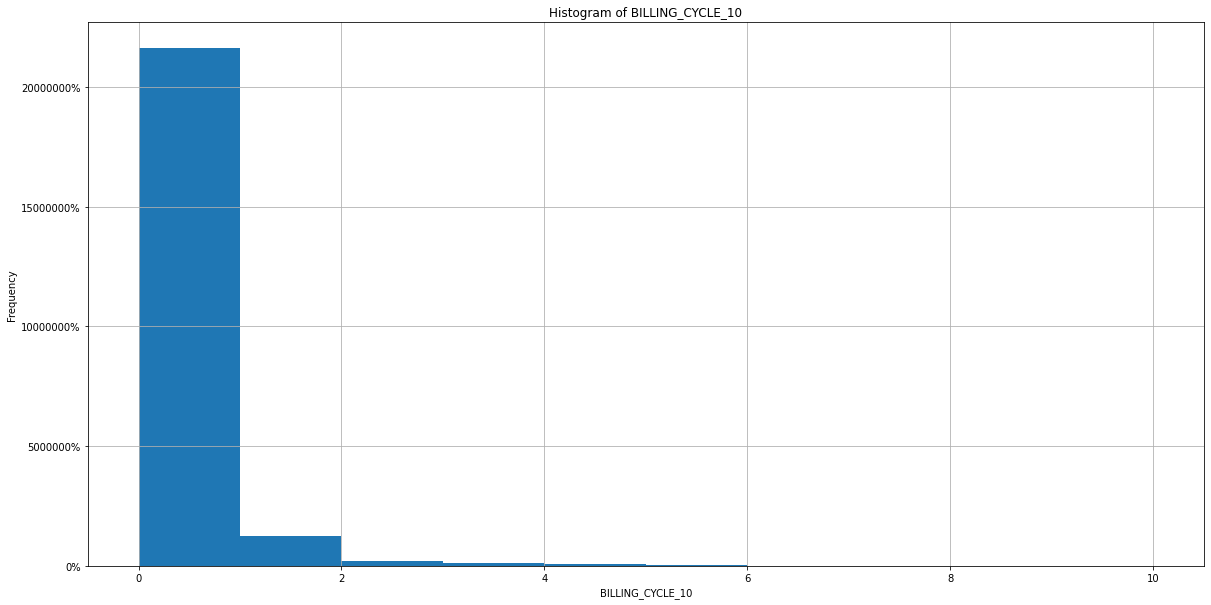

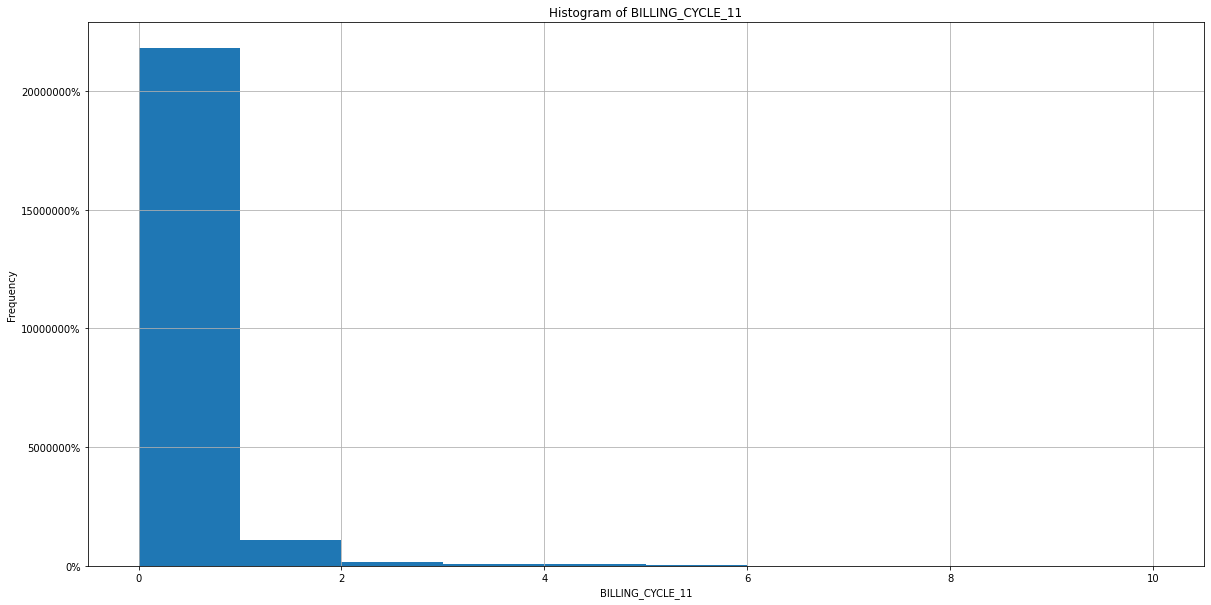

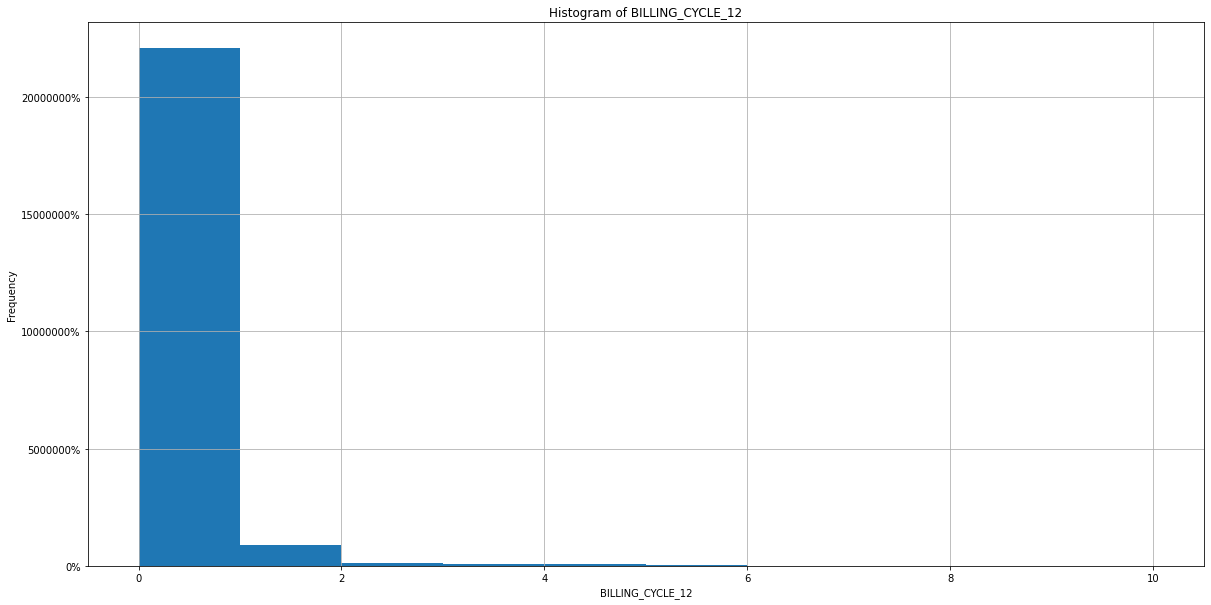

In [0]:
eda.plot_hist() 


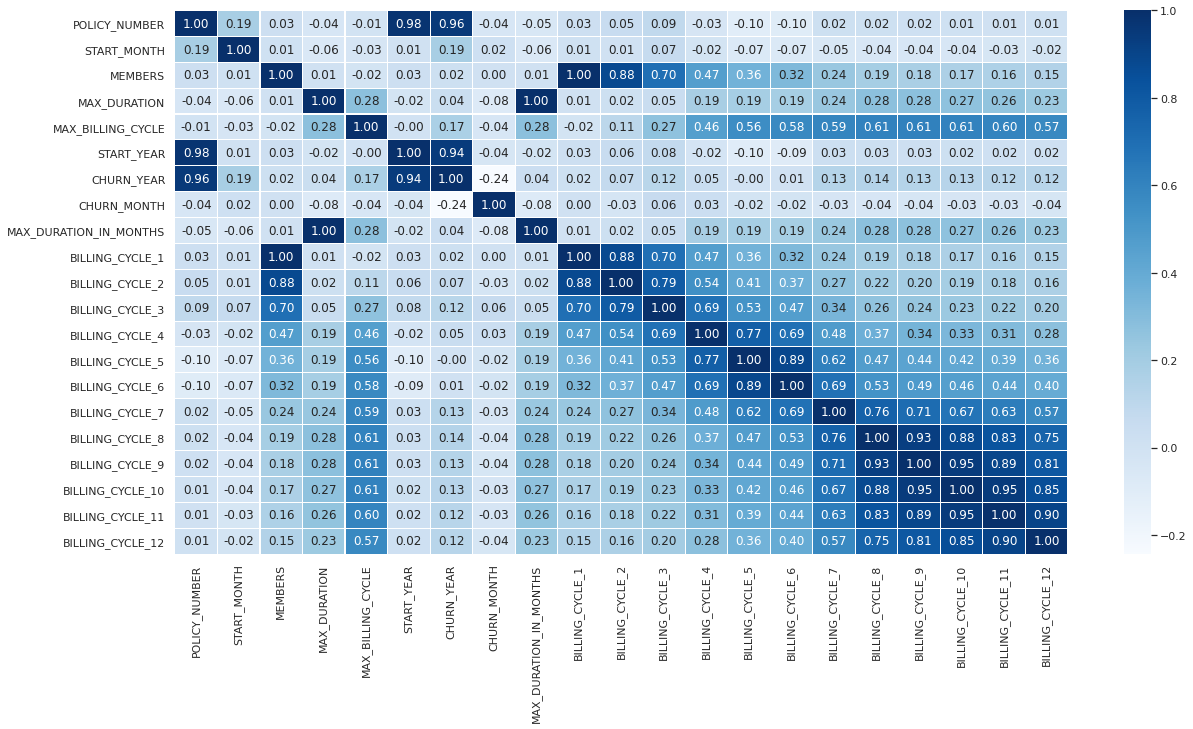

In [0]:
eda.sns_heatmap()

'--------------------scatter plot numerical variables by label--------------------'

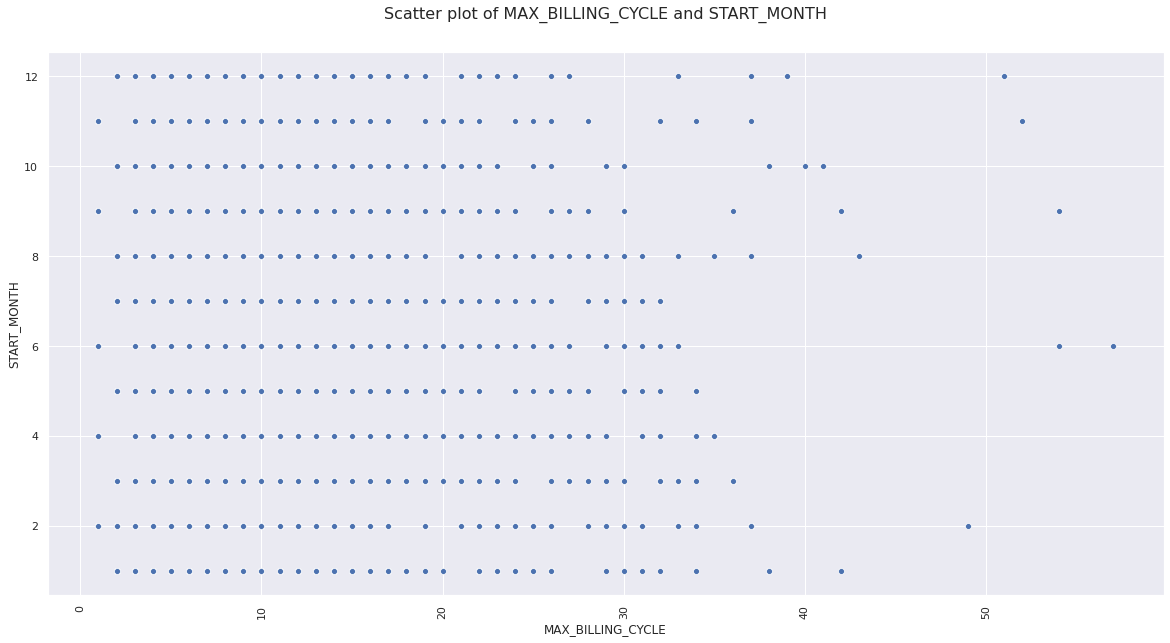

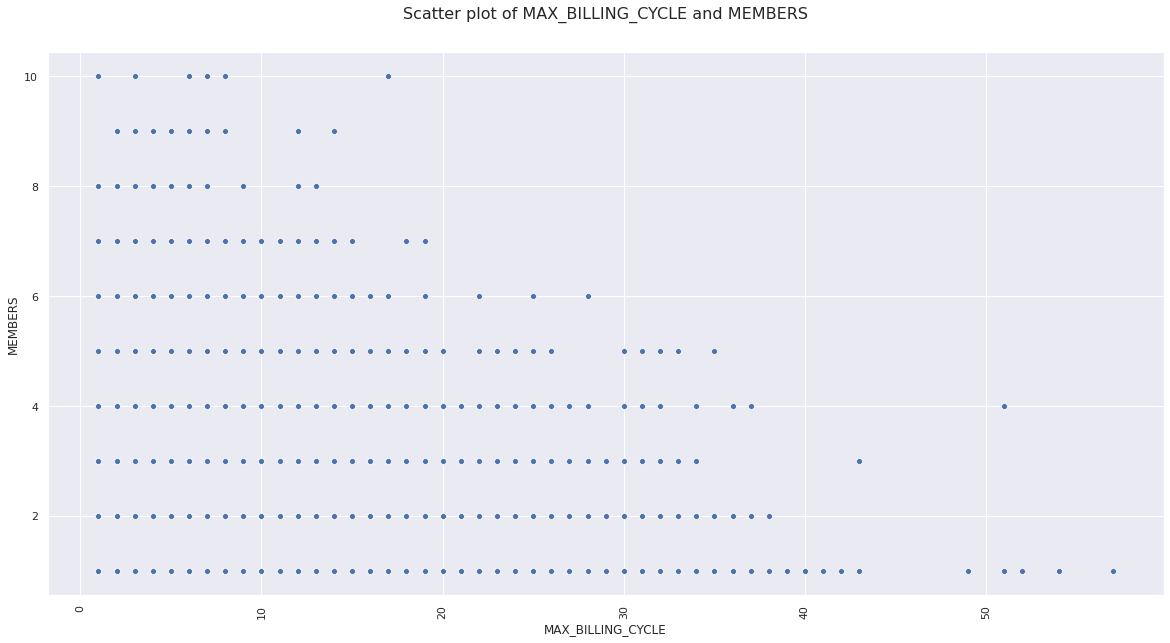

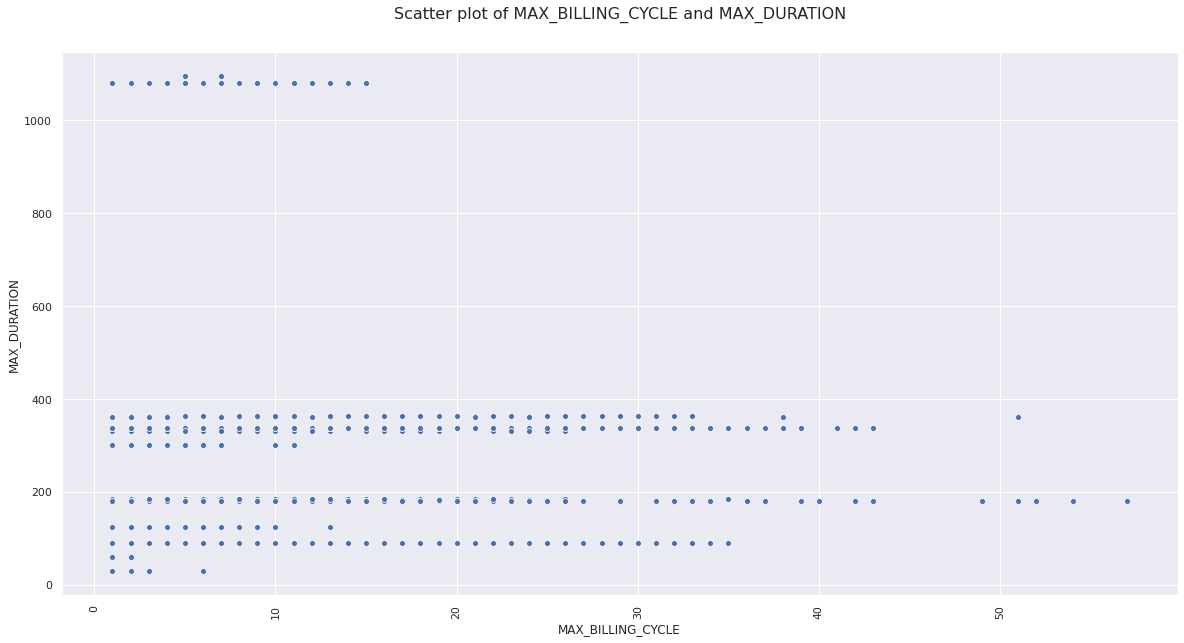

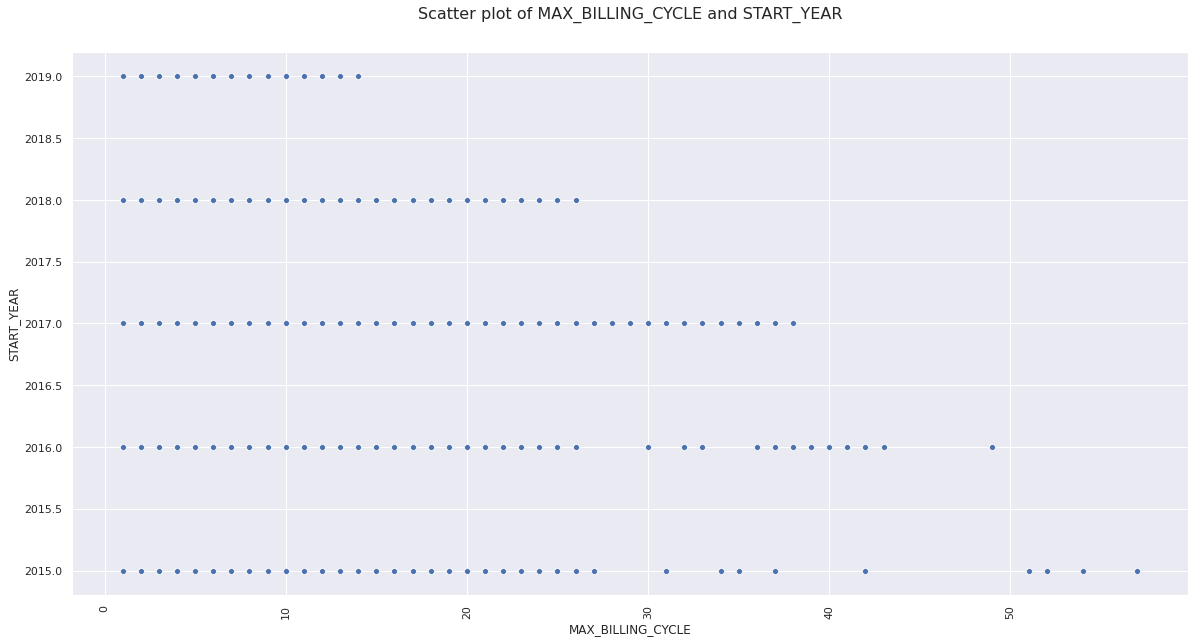

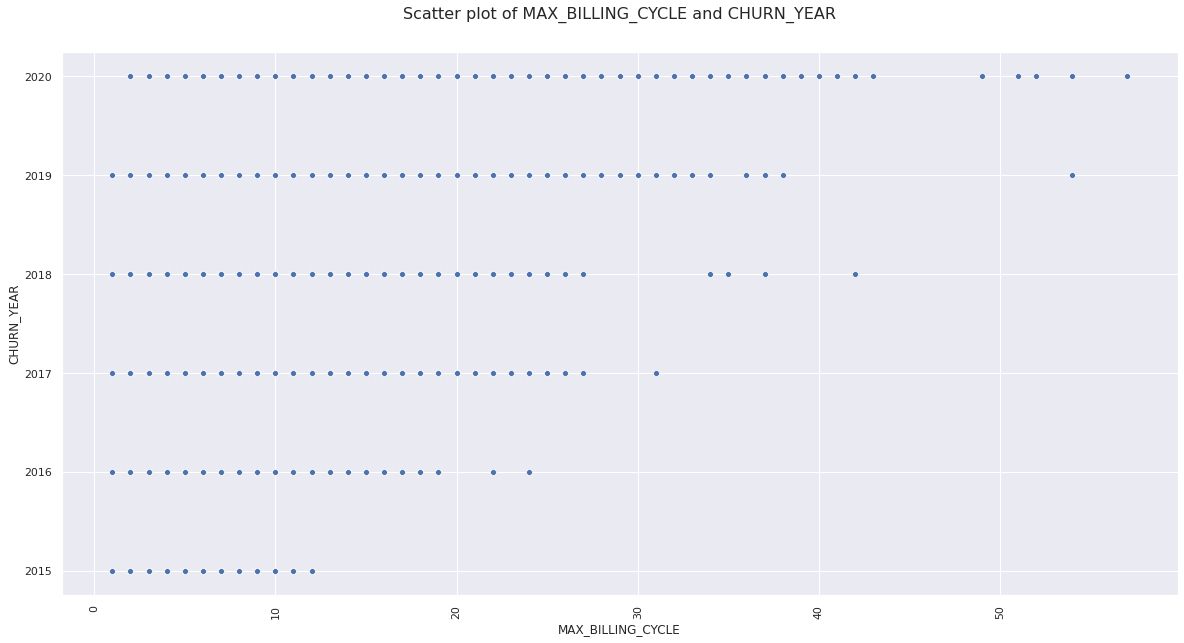

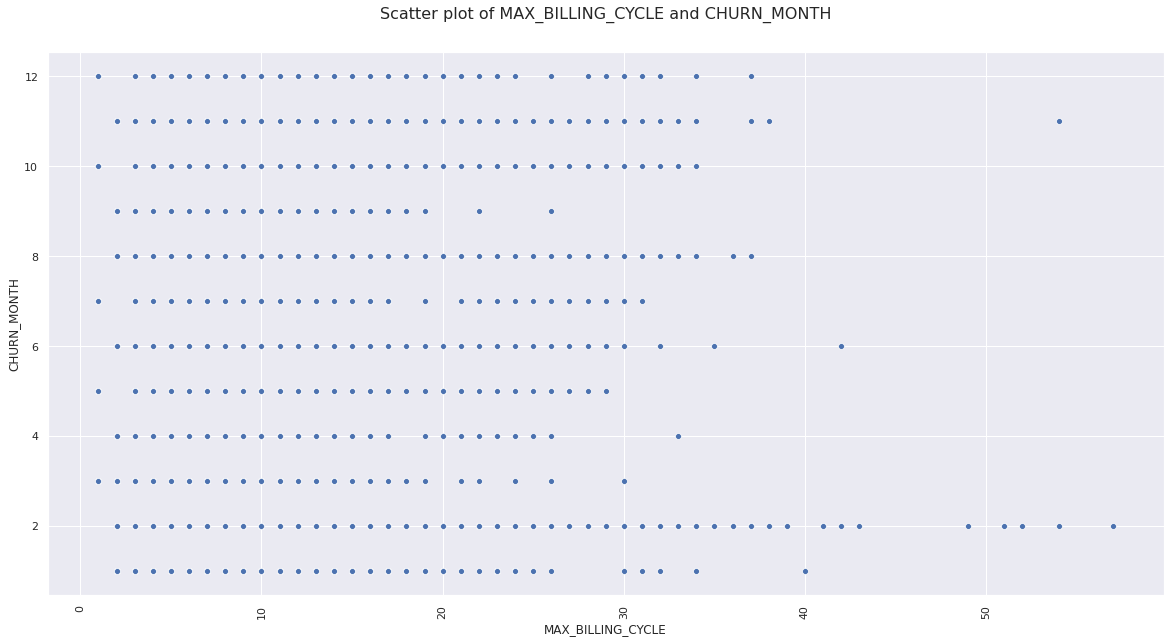

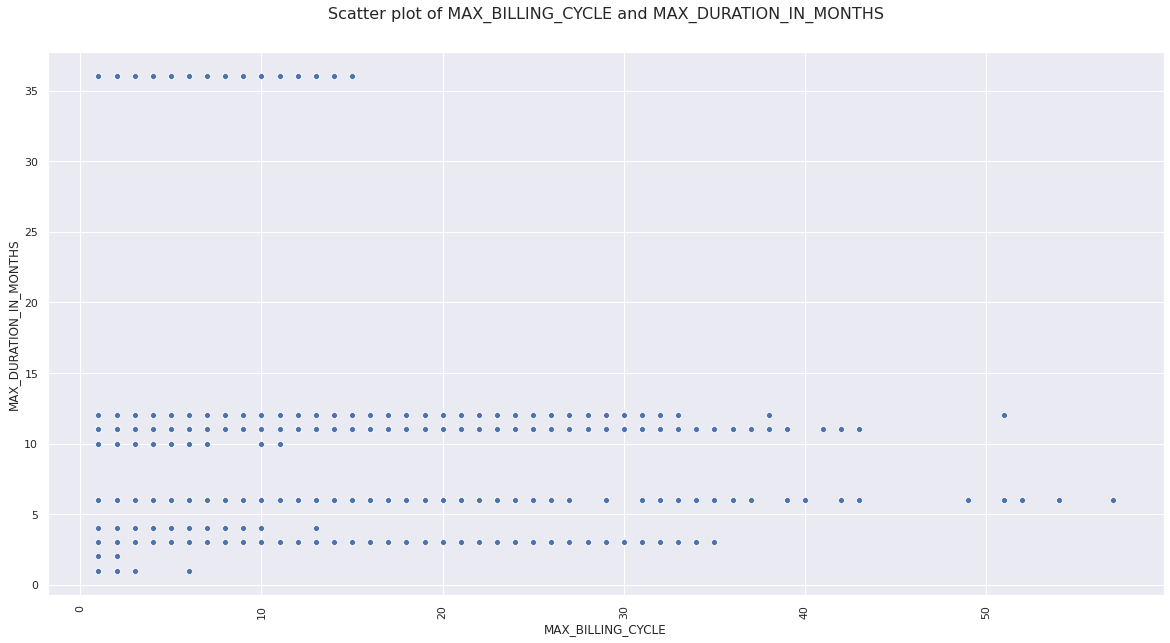

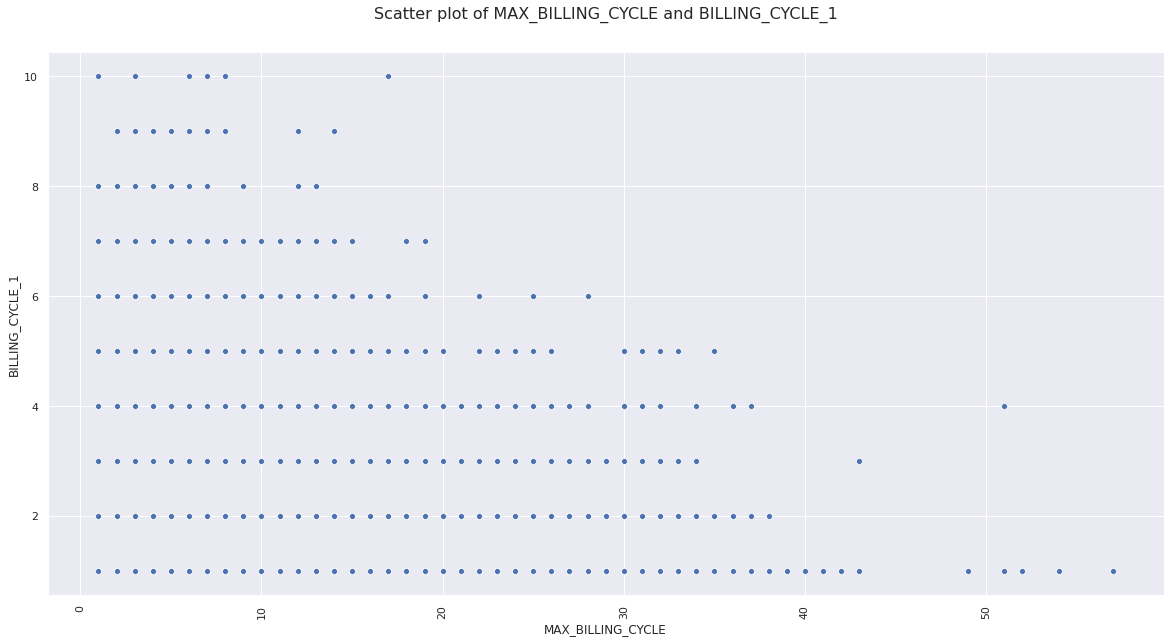

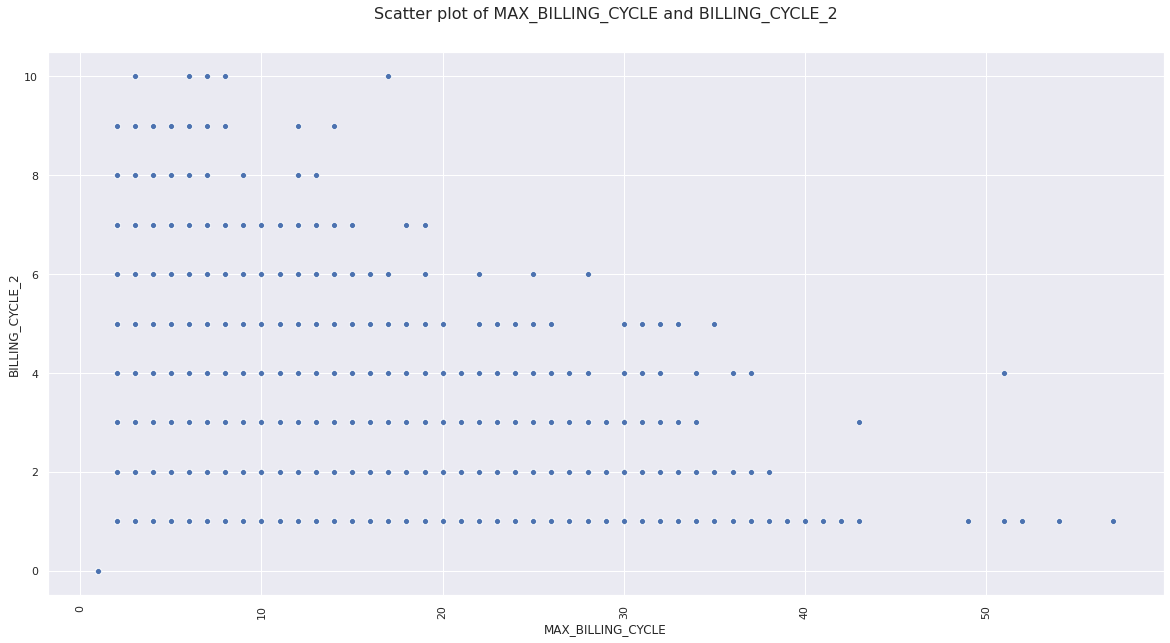

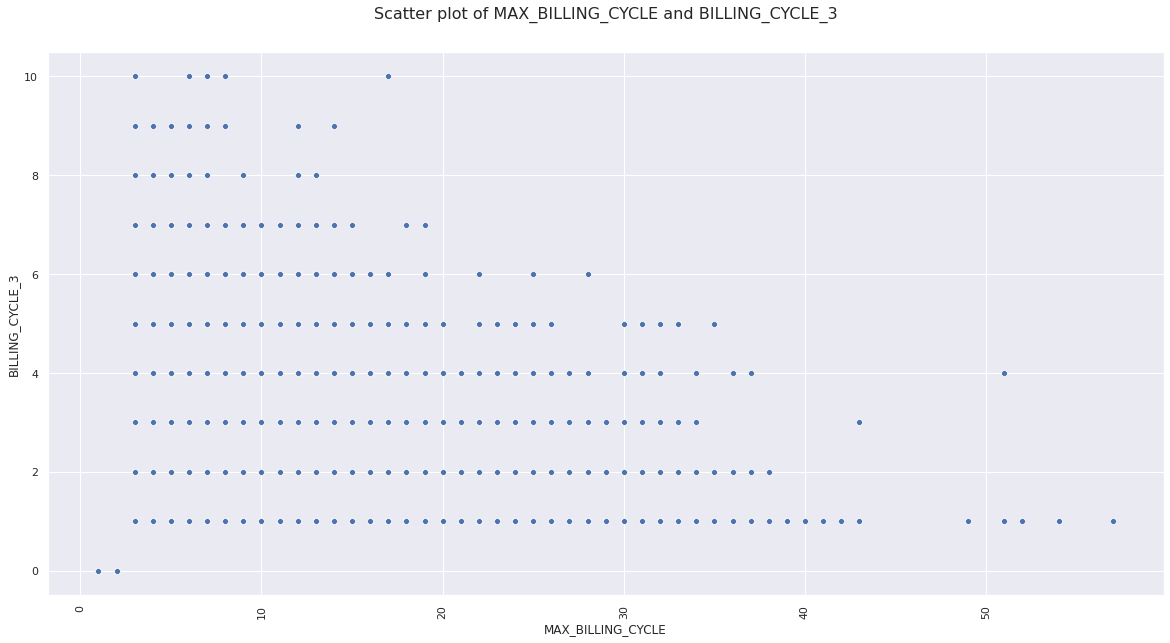

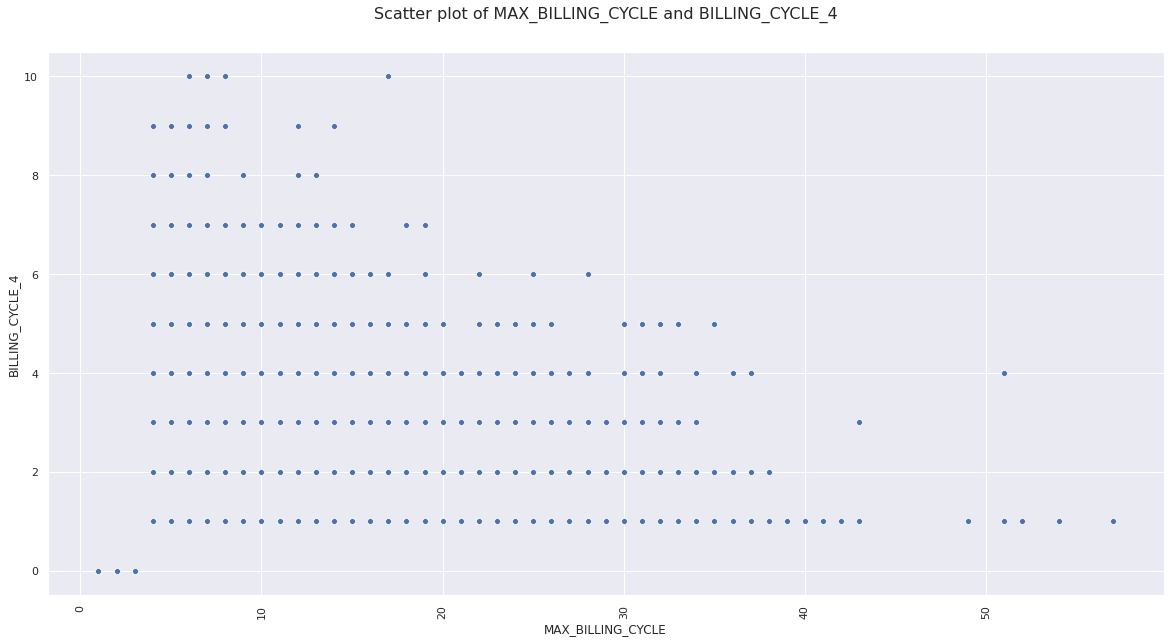

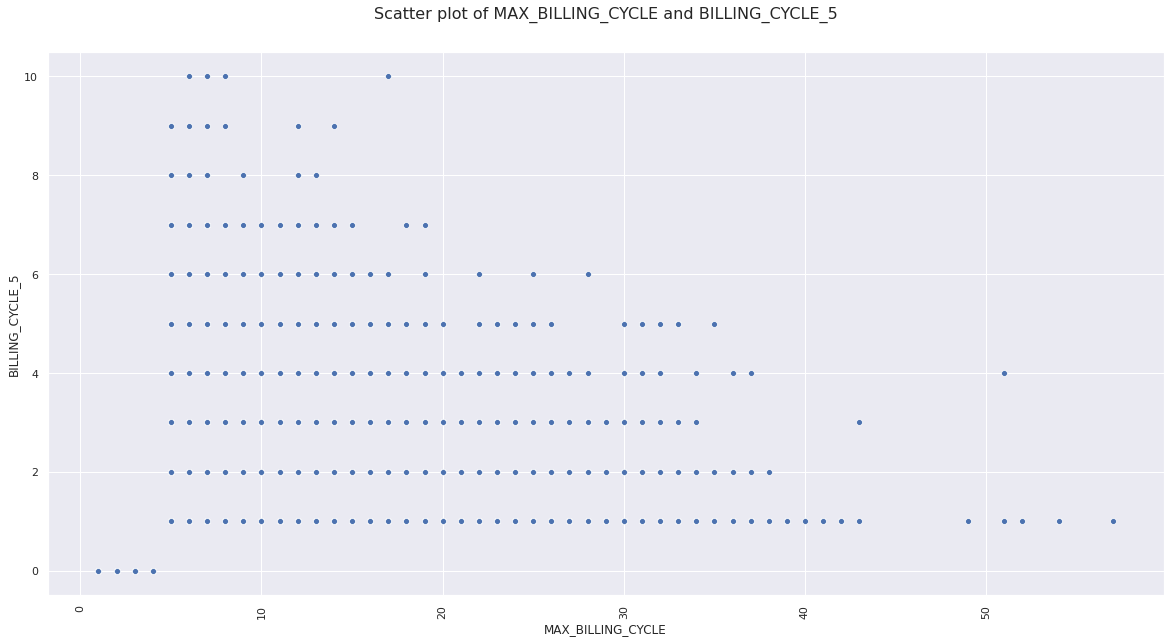

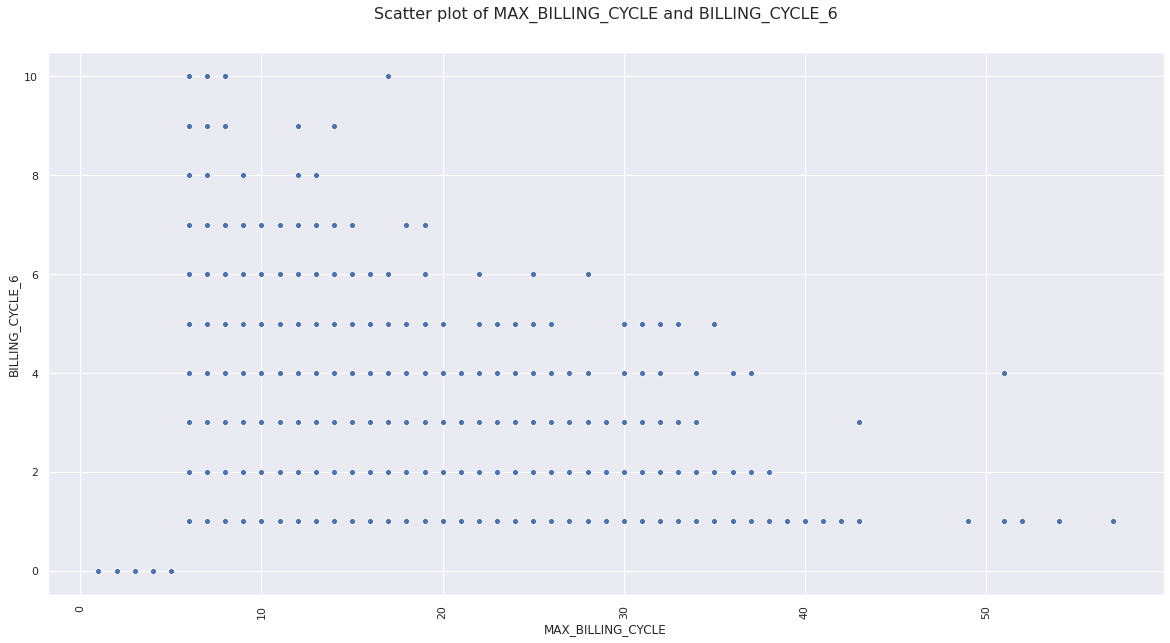

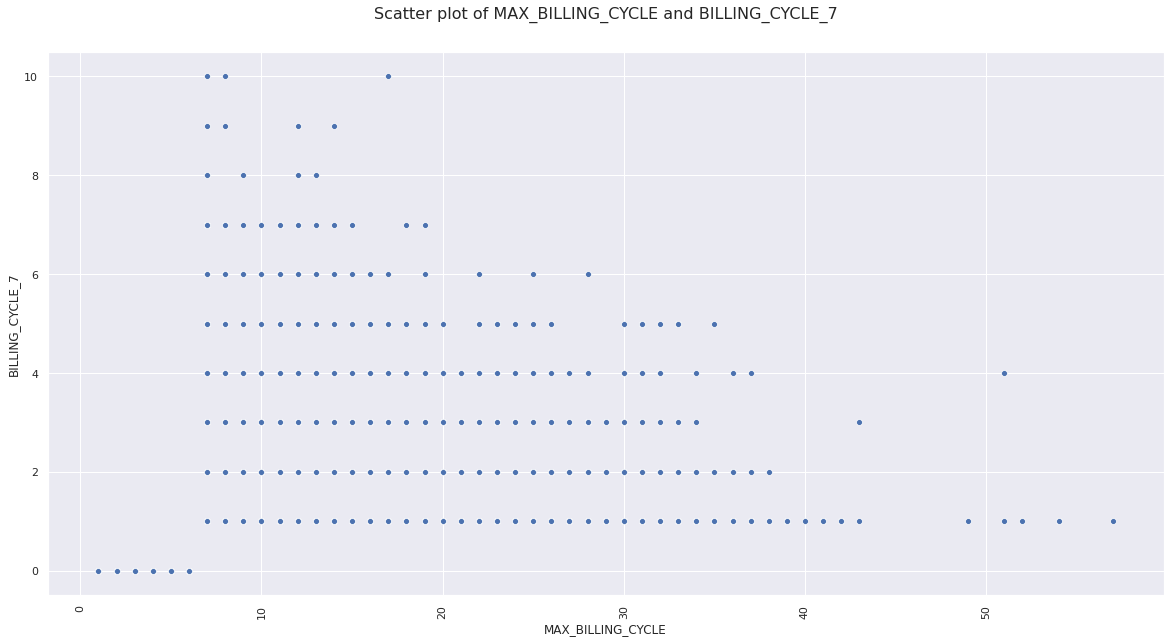

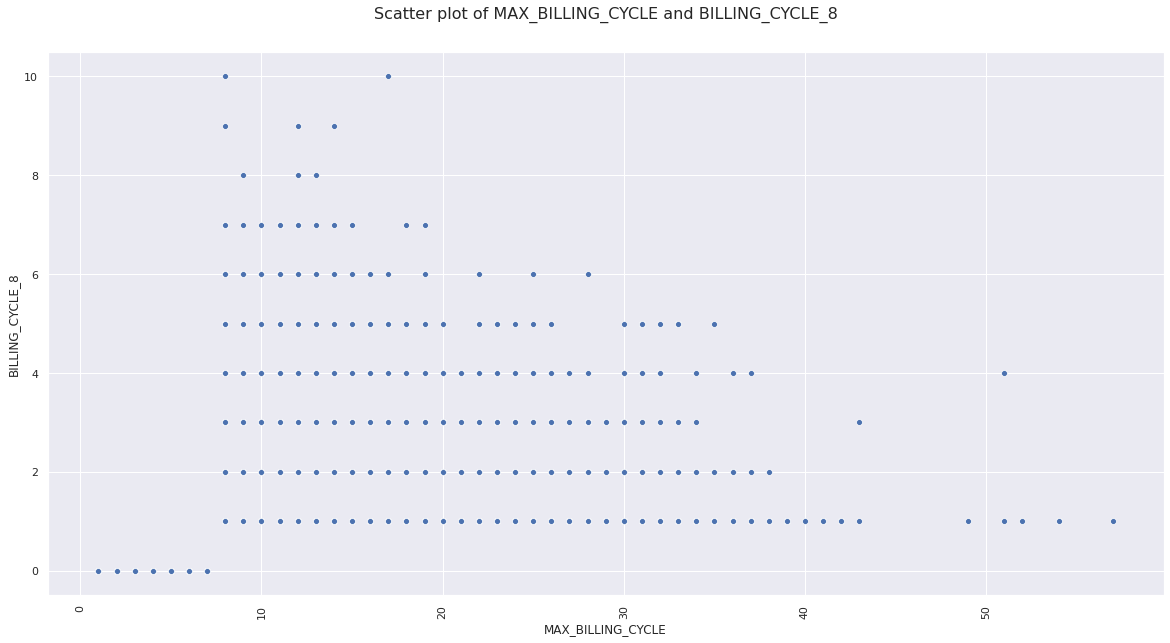

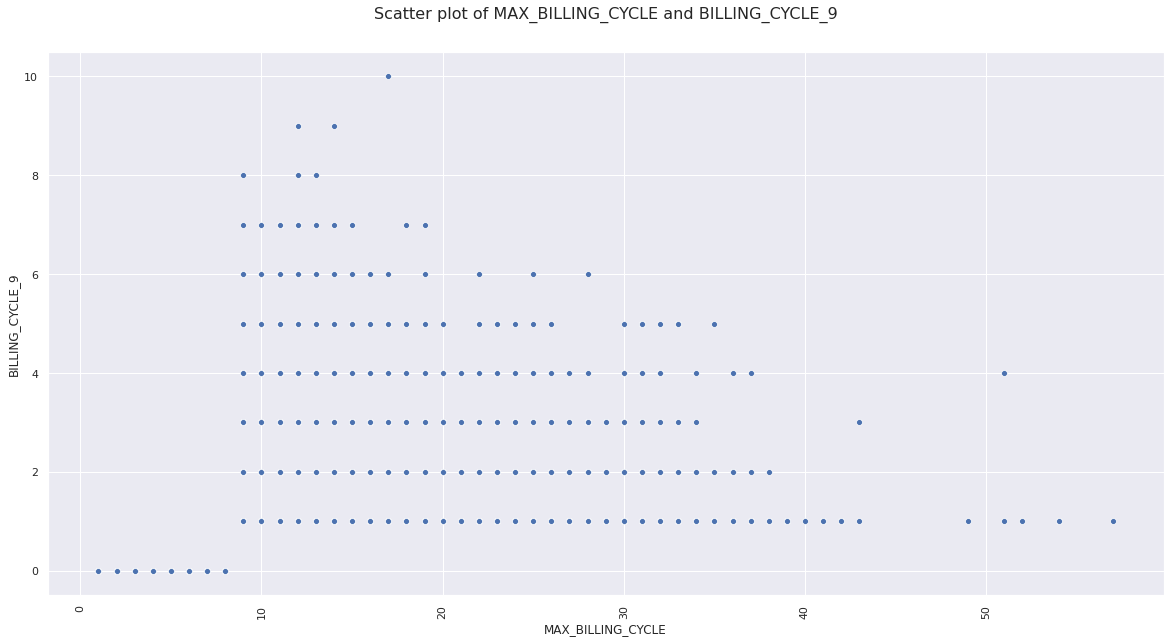

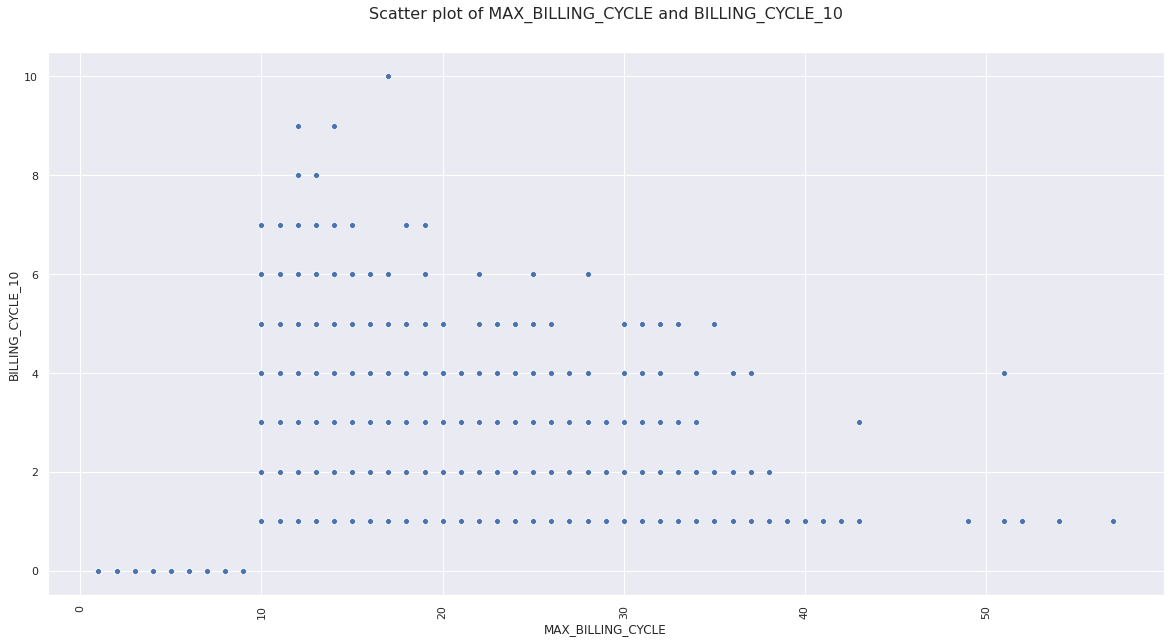

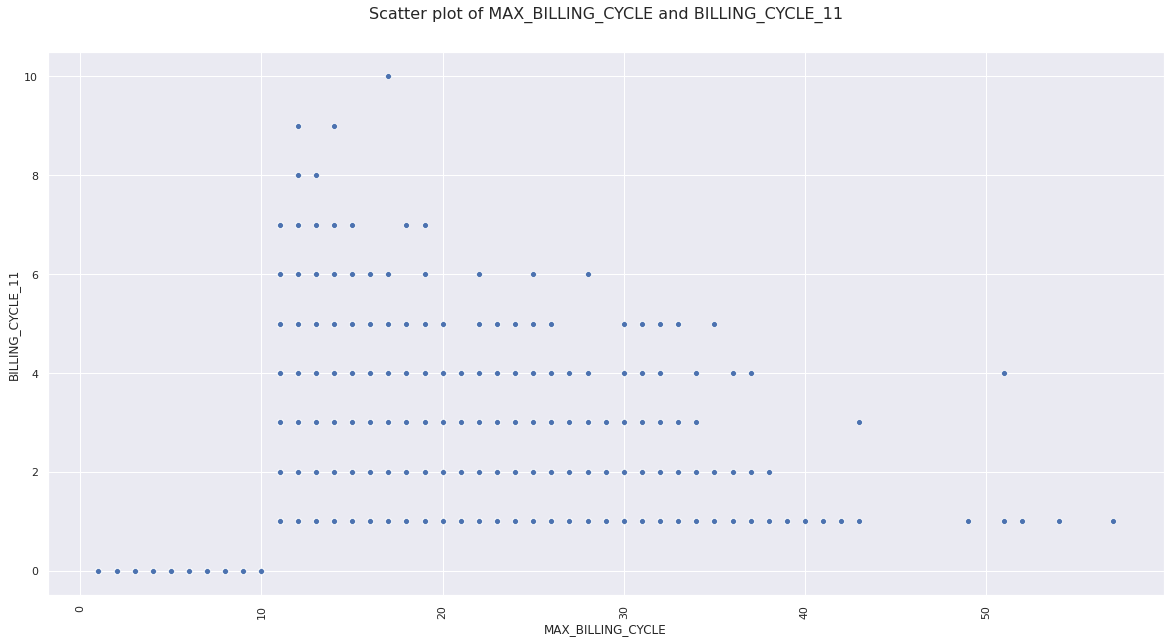

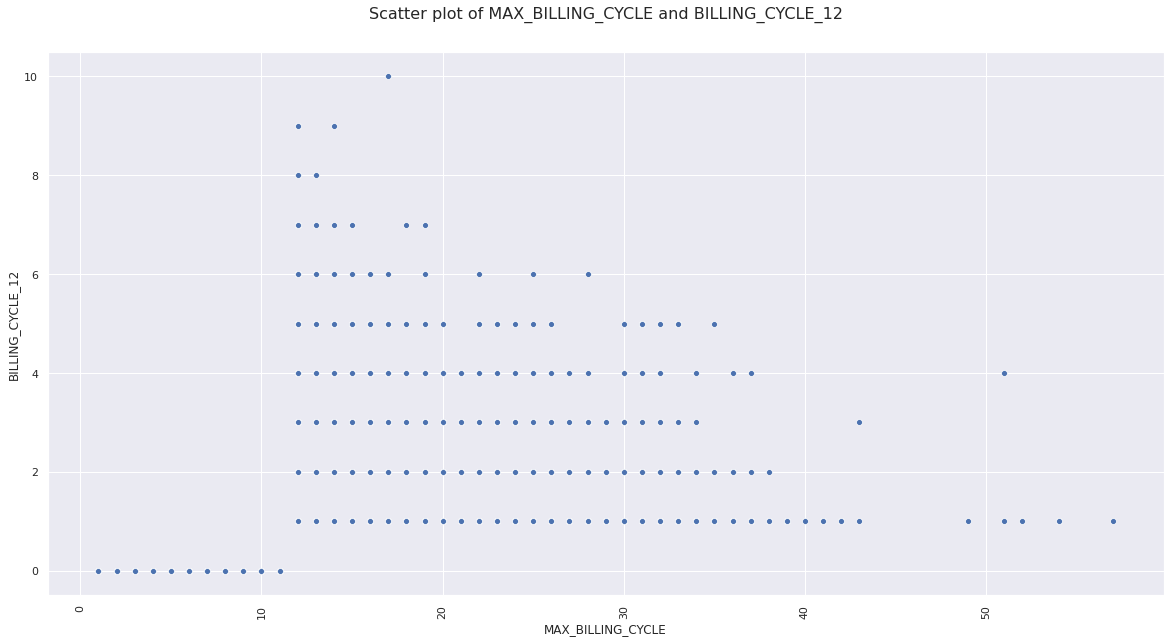

In [0]:
eda.scatter_plot_independent_label()

'--------------------bar plot of each categorical variables segmented by another categorical variables--------------------'

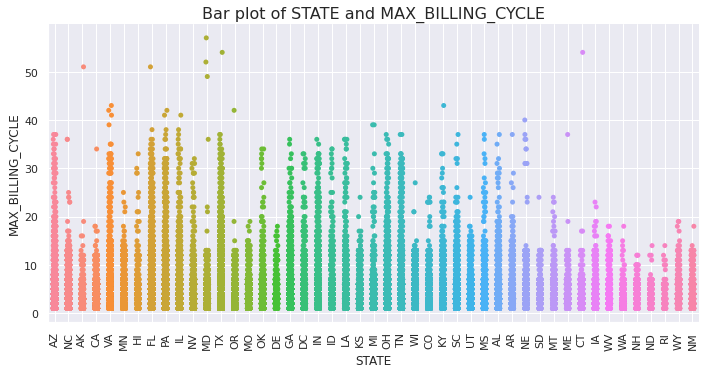

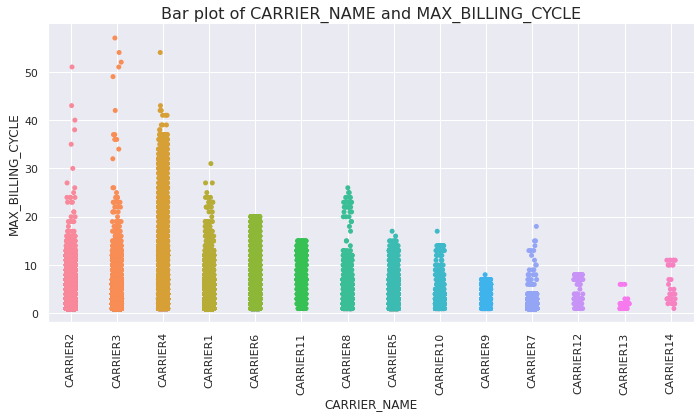

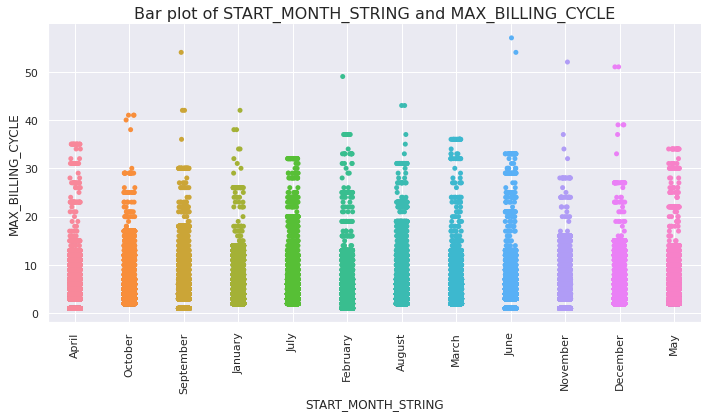

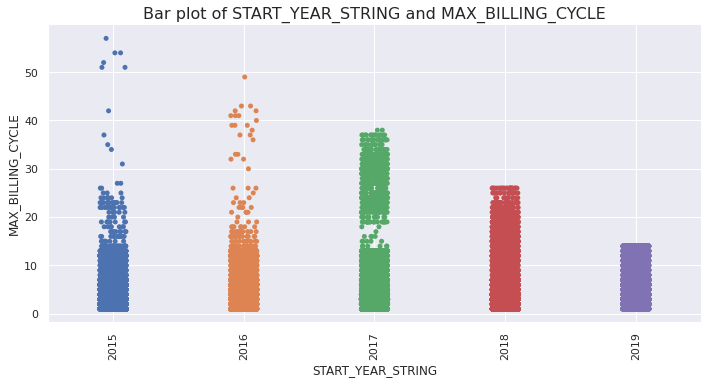

In [0]:
eda.cat_plot_independent_label()

'--------------------box plot of dependent varaible for categorical variable--------------------'

No handles with labels found to put in legend.


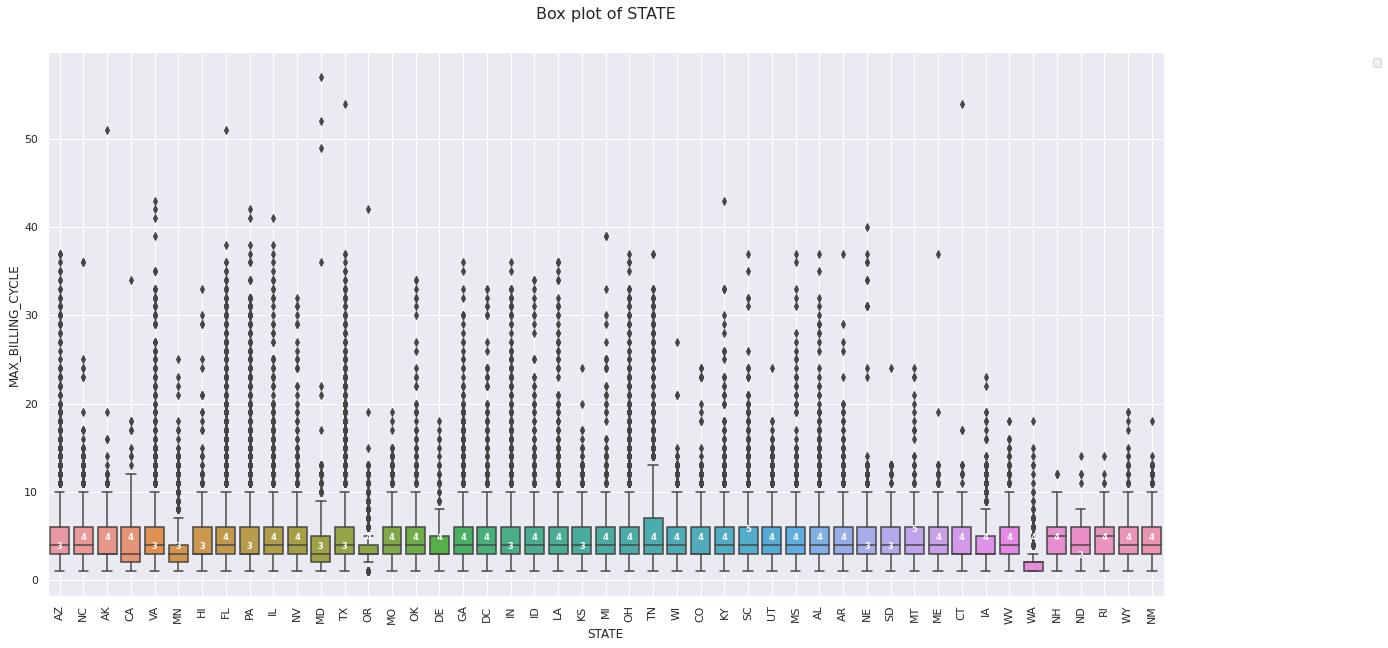

No handles with labels found to put in legend.


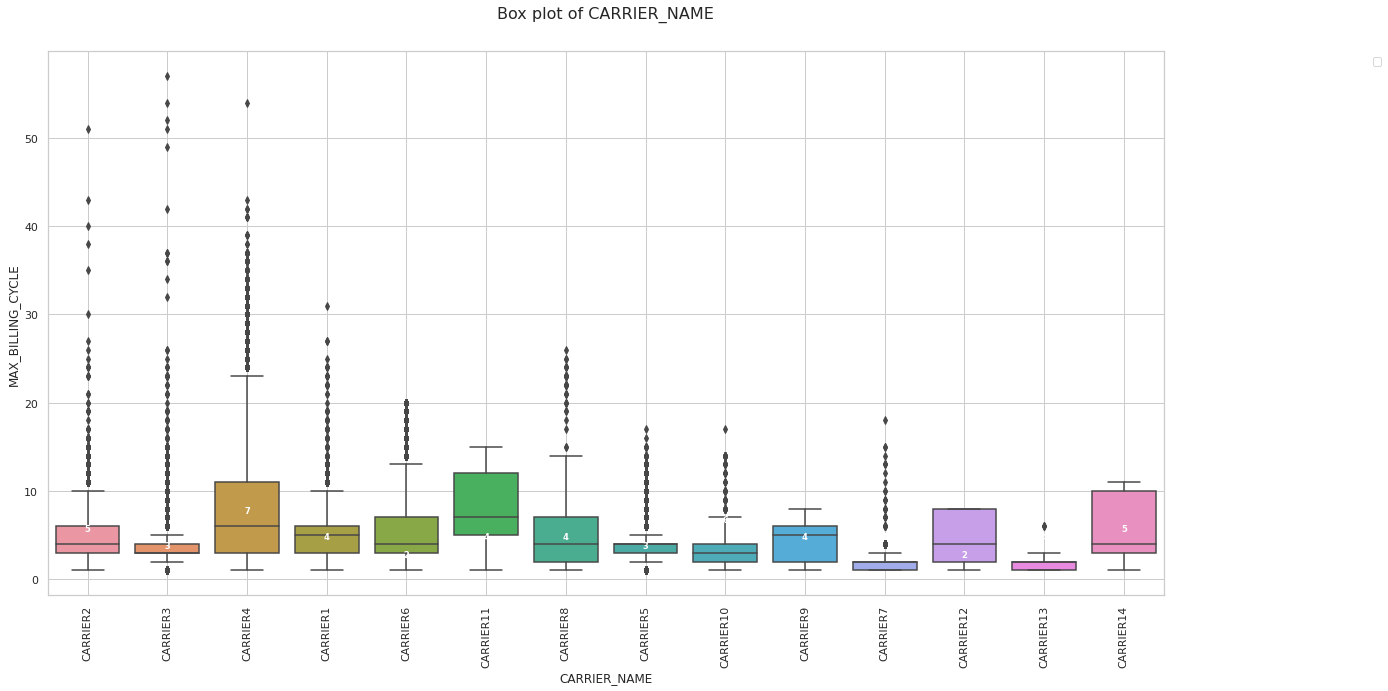

No handles with labels found to put in legend.


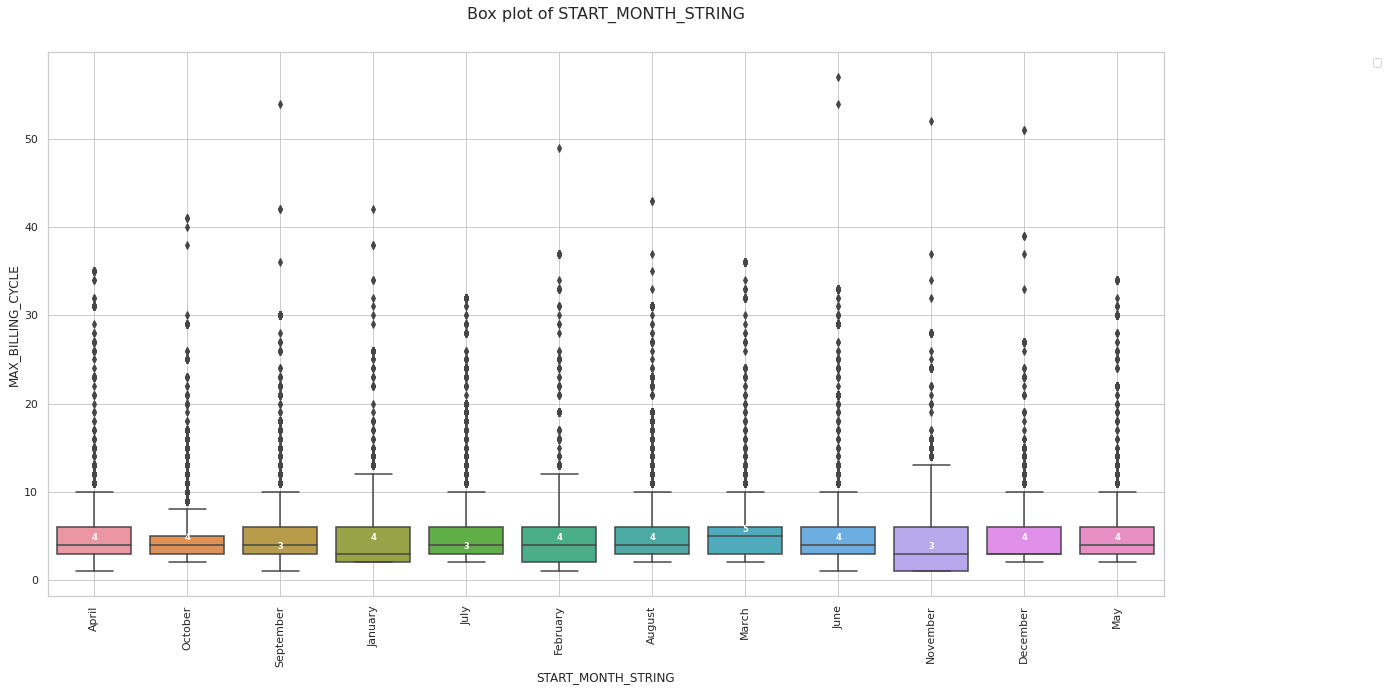

No handles with labels found to put in legend.


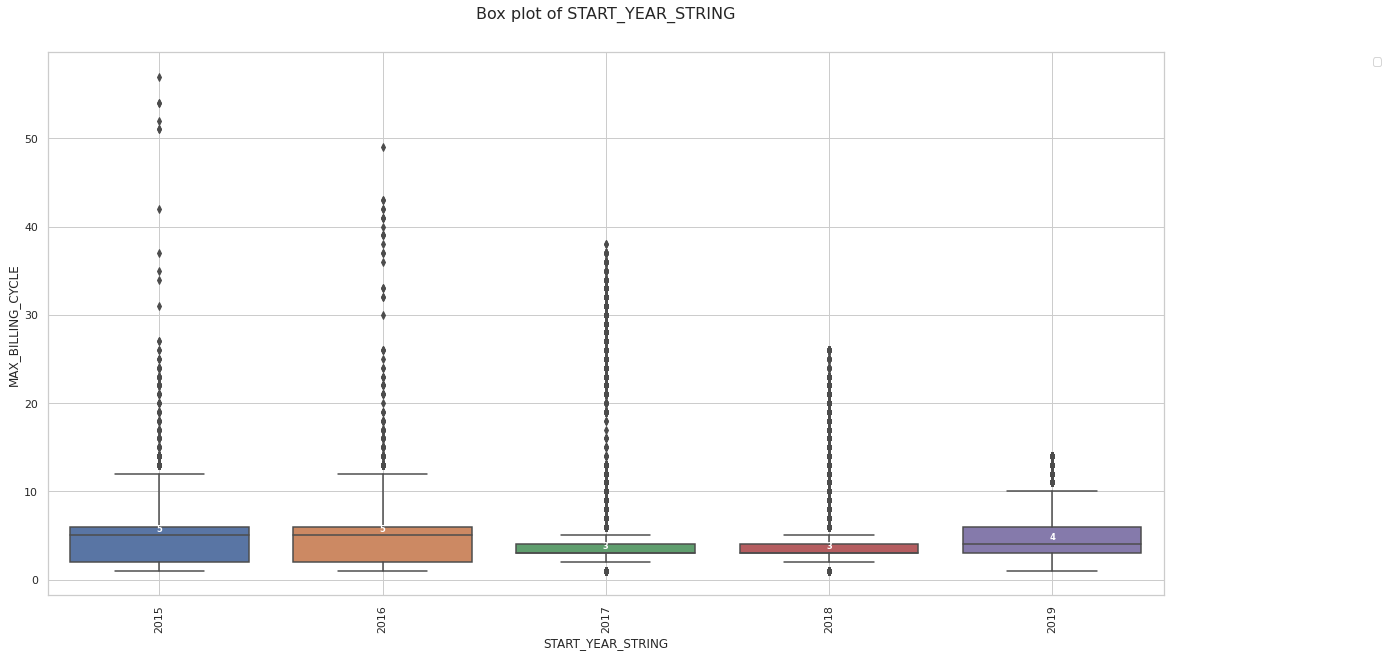

In [0]:
eda.box_plot_categorical_label()

### Observations
1.  Length of a member lifetime (measured through feature:Max_duration) impacted by the two categorical features carrier and state(to some extent).  





### 6a. Monthly Retention Curve

In [0]:
ltv_df_filtered.shape

(232957, 27)

In [0]:
retention_df=ltv_df_filtered.groupby(['START_DATE','START_YEAR','START_MONTH']).agg({'BILLING_CYCLE_1':'sum',
                                                        'BILLING_CYCLE_2':'sum',
                                                        'BILLING_CYCLE_3':'sum',
                                                        'BILLING_CYCLE_4':'sum',
                                                        'BILLING_CYCLE_5':'sum',
                                                        'BILLING_CYCLE_6':'sum',
                                                        'BILLING_CYCLE_7':'sum',
                                                        'BILLING_CYCLE_8':'sum',
                                                        'BILLING_CYCLE_9':'sum',
                                                        'BILLING_CYCLE_10':'sum',
                                                        'BILLING_CYCLE_11':'sum',
                                                        'BILLING_CYCLE_12':'sum'}).reset_index()


d=retention_df#[(retention_df["START_DATE"]>="2019-01-01") & (retention_df["START_DATE"]<="2019-12-01")]
d

,START_DATE,START_YEAR,START_MONTH,BILLING_CYCLE_1,BILLING_CYCLE_2,BILLING_CYCLE_3,BILLING_CYCLE_4,BILLING_CYCLE_5,BILLING_CYCLE_6,BILLING_CYCLE_7,BILLING_CYCLE_8,BILLING_CYCLE_9,BILLING_CYCLE_10,BILLING_CYCLE_11,BILLING_CYCLE_12
0,2015-01-01,2015,1,5739,5739,2871,2431,2170,2170,800,555,520,484,462,413
1,2015-02-01,2015,2,5536,3971,3320,2879,2553,814,814,572,505,468,433,322
2,2015-03-01,2015,3,5221,5221,4114,3570,3126,2738,1185,652,621,578,507,382
3,2015-04-01,2015,4,5503,4331,4331,3706,3174,2841,964,558,511,435,377,294
4,2015-05-01,2015,5,5587,5587,4300,3669,3207,2835,877,512,415,359,313,259
5,2015-06-01,2015,6,6207,4697,4697,4077,3502,3090,1374,537,415,350,304,255
6,2015-07-01,2015,7,7034,7034,5290,4457,3930,3542,1055,531,439,381,357,284
7,2015-08-01,2015,8,7272,7272,5310,4504,3969,3035,1021,564,494,456,408,360
8,2015-09-01,2015,9,5716,4389,4389,3734,2700,2116,1004,494,414,387,372,312
9,2015-10-01,2015,10,6033,6033,4579,3262,2424,1968,780,472,406,390,362,298


In [0]:
 d1=pd.melt(d,id_vars="START_DATE",var_name='BILLING_CYCLE',value_name='ACTIVE_MEMBER')
d1=d1[d1.ACTIVE_MEMBER>0]
d1['BILLING_CYCLE']=d1['BILLING_CYCLE'].str[14:].astype(int)
d1['START_YEAR']=d1['START_DATE'].dt.year
timeseries="BILLING_CYCLE"
x="COHORT"
value="ACTIVE_MEMBER"
for y in d1['START_YEAR'].unique():
#df_d=df_group.groupby([timeseries,x], as_index=False)[value].agg({'group_size':'sum'})
    plt.figure(figsize=(10,7))
    sns.lineplot(x="BILLING_CYCLE", y="ACTIVE_MEMBER", hue="START_DATE",
                      data=d1[d1.START_YEAR==y])
    plt.legend(loc="upper right", bbox_to_anchor=(1.2,1.0))
    plt.title("Monthly Active Members " + timeseries + " and " + x)
    plt.show()

ValueError: ignored

In [0]:
d1=pd.melt(d,id_vars="START_DATE",var_name='BILLING_CYCLE',value_name='ACTIVE_MEMBER')
d1=d1[d1.ACTIVE_MEMBER>0]
d1['BILLING_CYCLE']=d1['BILLING_CYCLE'].str[14:].astype(int)
d1['START_YEAR']=d1['START_DATE'].dt.year
timeseries="BILLING_CYCLE"
x="COHORT"
value="ACTIVE_MEMBER"
for y in d1['START_YEAR'].unique():
#df_d=df_group.groupby([timeseries,x], as_index=False)[value].agg({'group_size':'sum'})
    plt.figure(figsize=(10,7))
    sns.lineplot(x="BILLING_CYCLE", y="ACTIVE_MEMBER", hue="START_DATE",
                      data=d1[d1.START_YEAR==y])
    plt.legend(loc="upper right", bbox_to_anchor=(1.2,1.0))
    plt.title("Monthly Active Members " + timeseries + " and " + x)
    plt.show()

In [0]:
d1=pd.melt(d,id_vars="START_DATE",var_name='BILLING_CYCLE',value_name='ACTIVE_MEMBER')
d1=d1[d1.ACTIVE_MEMBER>0]
d1['BILLING_CYCLE']=d1['BILLING_CYCLE'].str[14:].astype(int)
d1['START_YEAR']=d1['START_DATE'].dt.year
d1['START_YEAR']=d1['START_DATE'].dt.year
timeseries="BILLING_CYCLE"
x="COHORT"
value="ACTIVE_MEMBER"
for y in d1['START_YEAR'].unique():
#df_d=df_group.groupby([timeseries,x], as_index=False)[value].agg({'group_size':'sum'})
    plt.figure(figsize=(10,7))
    sns.lineplot(x="BILLING_CYCLE", y="ACTIVE_MEMBER", hue="START_DATE",
                      data=d1[d1.START_YEAR==y])
    plt.legend(loc="upper right", bbox_to_anchor=(1.2,1.0))
    plt.title("Monthly Active Members " + timeseries + " and " + x)
    plt.show()

In [0]:
d1=d1[(d1["START_DATE"]>="2019-01-01") & (d1["START_DATE"]<="2019-12-01")]
timeseries="BILLING_CYCLE"
x="COHORT"
value="ACTIVE_MEMBER"
#df_d=df_group.groupby([timeseries,x], as_index=False)[value].agg({'group_size':'sum'})
plt.figure(figsize=(20,10))
sns.lineplot(x="BILLING_CYCLE", y="ACTIVE_MEMBER", hue="START_DATE",
                  data=d1)
plt.legend(loc="upper right", bbox_to_anchor=(1.2,1.0))
plt.title("Monthly Active Members " + timeseries + " and " + x)
plt.show()

### 6b. Monthly Retention Curve (in %)

In [0]:
def div_by_zero(numerator,denominator):
  if denominator==0:
    return 0
  else:
    return numerator/denominator

def aggfunc(x):
   
    data = {'MRR_CYCLE_1':100.0,
            'MRR_CYCLE_2': 100.0*(div_by_zero(sum(x.BILLING_CYCLE_2),sum(x.BILLING_CYCLE_1))),
            'MRR_CYCLE_3': 100.0*(div_by_zero(sum(x.BILLING_CYCLE_3),sum(x.BILLING_CYCLE_2))),
            'MRR_CYCLE_4': 100.0*(div_by_zero(sum(x.BILLING_CYCLE_4),sum(x.BILLING_CYCLE_3))),
            'MRR_CYCLE_5': 100.0*(div_by_zero(sum(x.BILLING_CYCLE_5),sum(x.BILLING_CYCLE_4))),
            'MRR_CYCLE_6': 100.0*(div_by_zero(sum(x.BILLING_CYCLE_6),sum(x.BILLING_CYCLE_5))),
            'MRR_CYCLE_7': 100.0*(div_by_zero(sum(x.BILLING_CYCLE_7),sum(x.BILLING_CYCLE_6))),
            'MRR_CYCLE_8': 100.0*(div_by_zero(sum(x.BILLING_CYCLE_8),sum(x.BILLING_CYCLE_7))),
            'MRR_CYCLE_9': 100.0*(div_by_zero(sum(x.BILLING_CYCLE_9),sum(x.BILLING_CYCLE_8))),
            'MRR_CYCLE_10': 100.0*(div_by_zero(sum(x.BILLING_CYCLE_10),sum(x.BILLING_CYCLE_9))),
            'MRR_CYCLE_11': 100.0*(div_by_zero(sum(x.BILLING_CYCLE_11),sum(x.BILLING_CYCLE_10))),
            'MRR_CYCLE_12': 100.0*(div_by_zero(sum(x.BILLING_CYCLE_12),sum(x.BILLING_CYCLE_11)))}
  
    return pd.Series(data)
      


retention_df = ltv_df_filtered.groupby('START_DATE').apply(aggfunc).reset_index()

d=retention_df[(retention_df["START_DATE"]>="2019-01-01") & (retention_df["START_DATE"]<="2019-12-01")]
d


In [0]:
d1=pd.melt(d,id_vars="START_DATE",var_name='BILLING_CYCLE',value_name='RETENTION_RATE')
d1=d1[d1.RETENTION_RATE>0]
d1['BILLING_CYCLE']=d1['BILLING_CYCLE'].str[10:].astype(int)

timeseries="BILLING_CYCLE"
x="COHORT"
value="RETENTION_RATE"
#df_d=df_group.groupby([timeseries,x], as_index=False)[value].agg({'group_size':'sum'})
plt.figure(figsize=(20,10))
sns.lineplot(x="BILLING_CYCLE", y="RETENTION_RATE", hue="START_DATE",
                  data=d1)
plt.legend(loc="upper right", bbox_to_anchor=(1.2,1.0))
plt.title("Monthly Retention Rate by " + timeseries + " and " + x)
plt.show()

### 6c. Cumulative Retention Curve

In [0]:
pd.options.mode.chained_assignment = None


d['CMRR_CYCLE_1']=100.0
d['CMRR_CYCLE_2']=(d['CMRR_CYCLE_1']*d['MRR_CYCLE_2'])/100
d['CMRR_CYCLE_3']=(d['CMRR_CYCLE_2']*d['MRR_CYCLE_3'])/100
d['CMRR_CYCLE_4']=(d['CMRR_CYCLE_3']*d['MRR_CYCLE_4'])/100
d['CMRR_CYCLE_5']=(d['CMRR_CYCLE_4']*d['MRR_CYCLE_5'])/100
d['CMRR_CYCLE_6']=(d['CMRR_CYCLE_5']*d['MRR_CYCLE_6'])/100
d['CMRR_CYCLE_7']=(d['CMRR_CYCLE_6']*d['MRR_CYCLE_7'])/100
d['CMRR_CYCLE_8']=(d['CMRR_CYCLE_7']*d['MRR_CYCLE_8'])/100
d['CMRR_CYCLE_9']=(d['CMRR_CYCLE_8']*d['MRR_CYCLE_9'])/100
d['CMRR_CYCLE_10']=(d['CMRR_CYCLE_9']*d['MRR_CYCLE_10'])/100
d['CMRR_CYCLE_11']=(d['CMRR_CYCLE_10']*d['MRR_CYCLE_11'])/100
d['CMRR_CYCLE_12']=(d['CMRR_CYCLE_11']*d['MRR_CYCLE_12'])/100


cumulative=d[['START_DATE','CMRR_CYCLE_1','CMRR_CYCLE_2','CMRR_CYCLE_3','CMRR_CYCLE_4','CMRR_CYCLE_5','CMRR_CYCLE_6','CMRR_CYCLE_7','CMRR_CYCLE_8','CMRR_CYCLE_9','CMRR_CYCLE_10','CMRR_CYCLE_11','CMRR_CYCLE_12']]
cumulative

In [0]:
cumulative_melt=pd.melt(cumulative,id_vars="START_DATE",var_name='BILLING_CYCLE',value_name='CUMULATIVE_RETENTION_RATE')
cumulative_melt=cumulative_melt[cumulative_melt.CUMULATIVE_RETENTION_RATE>0]
cumulative_melt['BILLING_CYCLE']=cumulative_melt['BILLING_CYCLE'].str[11:].astype(int)

timeseries="BILLING_CYCLE"
x="COHORT"
value="CUMULATIVE_RETENTION_RATE"
#df_d=df_group.groupby([timeseries,x], as_index=False)[value].agg({'group_size':'sum'})
plt.figure(figsize=(20,10))
sns.lineplot(x="BILLING_CYCLE", y="CUMULATIVE_RETENTION_RATE", hue="START_DATE",
                  data=cumulative_melt)
plt.legend(loc="upper right", bbox_to_anchor=(1.2,1.0))
plt.title("Cumulative Retention Rate by " + timeseries + " and " + x)
plt.show()

### 7a. Preliminary Model Selection

In [0]:
ltv_df_model=ltv_df_filtered[['POLICY_NUMBER','START_MONTH','START_DATE','MEMBERS','STATE','CARRIER_NAME','MAX_BILLING_CYCLE']]
ltv_df_model.describe()

In [0]:
#ltv_df_model=ltv_df_model[(ltv_df_model.MAX_BILLING_CYCLE<20) & (ltv_df_model.MAX_BILLING_CYCLE!=2)]


In [0]:
ltv_df_filtered.shape

In [0]:
ltv_df_model=pd.get_dummies(ltv_df_model)

In [0]:
# Extract the training data
train_data =ltv_df_model[ltv_df_model.START_DATE<"2019-01-01"]
test_set_2019 = ltv_df_model[ltv_df_model.START_DATE>="2019-01-01"]
test_target_2019=test_set_2019['MAX_BILLING_CYCLE']
test_features_2019=test_set_2019.drop(columns = ['MAX_BILLING_CYCLE','POLICY_NUMBER','START_DATE'])

# Labels for training
target =train_data['MAX_BILLING_CYCLE']
features=train_data.drop(columns = ['MAX_BILLING_CYCLE','POLICY_NUMBER','START_DATE'])

In [0]:
# Import train_test_split
from sklearn.model_selection  import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

In [0]:
from sklearn.metrics import fbeta_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
import time as t

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = t.time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = t.time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
    
        
    # TODO: Get the predictions on the test set(X_test),
    start = t.time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = t.time() # Get end time
   
    results['pred_time'] = end - start
            
    results['acc_train'] = accuracy_score(y_train,predictions_train)
   
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    results['f_train'] = fbeta_score(y_train,predictions_train,beta=.5,average='weighted')
       
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=.5,average='weighted')
    
    #labels = [0,1]
    #cm_train = confusion_matrix(y_train, predictions_train, labels)
    #cm_test = confusion_matrix(y_test, predictions_test, labels)
    display(learner)
    #display(cm_train)
    #display(cm_test)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [0]:
import matplotlib.patches as mpatches
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (20,15))

    # Constants
    bar_width = 0.2
    colors = ['#A00000','#00A0A0','#00A000','#1b00a0']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Set")
    ax[0, 2].set_title("F-score on Training Set")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
      
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 4, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

### 7c. Preliminary Comparison

In [0]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#clf_A = DecisionTreeClassifier(max_depth=6,min_samples_leaf =40)
clf_A = GradientBoostingClassifier()
clf_B = KNeighborsClassifier()
clf_C= RandomForestClassifier()
clf_D= XGBClassifier()


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = (samples_100//10)
samples_1 = samples_100//100


# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C,clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    #print(clf)
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
      results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

'''

In [0]:
# Run metrics visualization for the three supervised learning models chosen
#evaluate(results)

### 7b. Model Training and Evaluation

####1.   Random Forest Classifier
#####2.   XGB Classifier



In [0]:
  from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV 
 
clf= RandomForestClassifier()

parameters = {'min_samples_leaf':[30,50,100,200,300], 'n_estimators':[100,500,1000,700],'max_features':["log2","sqrt","auto"]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=.5,average='weighted')

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scorer)


# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimatorc
best_clf = grid_fit.best_estimator_
best_params=grid_fit.best_params_


# Make predictions using the unoptimized and the optimized model 
l=clf.fit(X_train, y_train)
predictions = l.predict(X_test)

#best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5,average='weighted')))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,average='weighted')))
print ("Best estimator parameters")
print (best_params)

In [0]:
'''from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import fbeta_score,accuracy_score,f1_score
 
clf= XGBClassifier()

parameters = {'learning_rate':[.05,.1,.2,.3], 'max_depth':[6,7,8,9], 'min_child_weight':[1,2], 
              'gamma':[0], 'subsample':[1], 'colsample_bytree':[.3,.4,.5], 'n_estimators':[100,150]
             , 'reg_lambda':[1]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=.5,average='weighted')

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scorer)


# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimatorc
best_clf = grid_fit.best_estimator_
best_params=grid_fit.best_params_


# Make predictions using the unoptimized and the optimized model 
l=clf.fit(X_train, y_train)
predictions = l.predict(X_test)
#best_predictions = best_clf.predict(x_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5,average='weighted')))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,average='weighted')))
print ("Best estimator parameters")
print (best_params)'''

In [0]:
'''import xgboost as xgb
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = xgb.XGBClassifier(
        n_estimators=250,
        learning_rate=0.05,
        n_jobs=4,
        **params
    )
    
    score = cross_val_score(clf, X_train_d, Y_train_d, scoring=gini_scorer, cv=StratifiedKFold()).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
}

trials = Trials()
best = fmin(fn=objective, space=space,algo=tpe.suggest,   max_evals=10,trials=trials)
best_model = getBestModelfromTrials(trials)'''

In [0]:
'''import lightgbm as lgb
def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = lgbm.LGBMRegressor(
        n_estimators=500,
        learning_rate=0.01,
        **params
    )
    
    score = cross_val_score(clf, X, Y, scoring=gini_scorer, cv=StratifiedKFold()).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
}


trials = Trials()
best = fmin(fn=objective, space=space,algo=tpe.suggest,   max_evals=10,trials=trials)
best_model = getBestModelfromTrials(trials)
print("Hyperopt estimated optimum {}".format(best))

print("Hyperopt estimated optimum {}".format(best))'''

### 8. Predicted Cumulative Retention Curve 2019

In [0]:
predictions = l.predict(test_features_2019)
#best_predictions = best_clf.predict(x_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(test_target_2019, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(test_target_2019, predictions, beta = 0.5,average='weighted')))
test_features_2019['PREDICTED_MAX_BILLING_CYCLE']=predictions

In [0]:
best_predictions = best_clf.predict(test_features_2019)
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(test_target_2019, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,average='weighted')))
test_features_2019['PREDICTED_MAX_BILLING_CYCLE']=best_predictions

In [0]:
def billing_cycle(members,cycle,max_billing_cycle):
    if cycle <= max_billing_cycle:
        return members
    else:
        return 0

test_features_2019['START_DATE'] = test_set_2019['START_DATE']
test_features_2019['PREDICTED_BILLING_CYCLE_1'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,1, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_2'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,2, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_3'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,3, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_4'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,4, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_5'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,5, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_6'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,6, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_7'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,7, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_8'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,8, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_9'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,9, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_10'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,10, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_11'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,11, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_12'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,12, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019.head()

In [0]:
def aggfunc(x):
    data = {'MRR_CYCLE_1':100.0,
            'MRR_CYCLE_2': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_2)))/(sum(x.PREDICTED_BILLING_CYCLE_1)),
            'MRR_CYCLE_3': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_3)))/(sum(x.PREDICTED_BILLING_CYCLE_2)),
            'MRR_CYCLE_4': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_4)))/(sum(x.PREDICTED_BILLING_CYCLE_3)),
            'MRR_CYCLE_5': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_5)))/(sum(x.PREDICTED_BILLING_CYCLE_4)),
            'MRR_CYCLE_6': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_6)))/(sum(x.PREDICTED_BILLING_CYCLE_5)),
            'MRR_CYCLE_7': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_7)))/(sum(x.PREDICTED_BILLING_CYCLE_6)),
            'MRR_CYCLE_8': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_8)))/(sum(x.PREDICTED_BILLING_CYCLE_7)),
            'MRR_CYCLE_9': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_9)))/(sum(x.PREDICTED_BILLING_CYCLE_8)),
            'MRR_CYCLE_10': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_10)))/(sum(x.PREDICTED_BILLING_CYCLE_9)),
            'MRR_CYCLE_11': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_11)))/(sum(x.PREDICTED_BILLING_CYCLE_10)),
            'MRR_CYCLE_12': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_12)))/(sum(x.PREDICTED_BILLING_CYCLE_11))}

    return pd.Series(data)

d = test_features_2019.groupby('START_DATE').apply(aggfunc).reset_index()

In [0]:
pd.options.mode.chained_assignment = None
d['CMRR_CYCLE_1']=100.0
d['CMRR_CYCLE_2']=(d['CMRR_CYCLE_1']*d['MRR_CYCLE_2'])/100
d['CMRR_CYCLE_3']=(d['CMRR_CYCLE_2']*d['MRR_CYCLE_3'])/100
d['CMRR_CYCLE_4']=(d['CMRR_CYCLE_3']*d['MRR_CYCLE_4'])/100
d['CMRR_CYCLE_5']=(d['CMRR_CYCLE_4']*d['MRR_CYCLE_5'])/100
d['CMRR_CYCLE_6']=(d['CMRR_CYCLE_5']*d['MRR_CYCLE_6'])/100
d['CMRR_CYCLE_7']=(d['CMRR_CYCLE_6']*d['MRR_CYCLE_7'])/100
d['CMRR_CYCLE_8']=(d['CMRR_CYCLE_7']*d['MRR_CYCLE_8'])/100
d['CMRR_CYCLE_9']=(d['CMRR_CYCLE_8']*d['MRR_CYCLE_9'])/100
d['CMRR_CYCLE_10']=(d['CMRR_CYCLE_9']*d['MRR_CYCLE_10'])/100
d['CMRR_CYCLE_11']=(d['CMRR_CYCLE_10']*d['MRR_CYCLE_11'])/100
d['CMRR_CYCLE_12']=(d['CMRR_CYCLE_11']*d['MRR_CYCLE_12'])/100


cumulative=d[['START_DATE','CMRR_CYCLE_1','CMRR_CYCLE_2','CMRR_CYCLE_3','CMRR_CYCLE_4','CMRR_CYCLE_5','CMRR_CYCLE_6','CMRR_CYCLE_7','CMRR_CYCLE_8','CMRR_CYCLE_9','CMRR_CYCLE_10','CMRR_CYCLE_11','CMRR_CYCLE_12']]
cumulative

In [0]:
cumulative_melt=pd.melt(cumulative,id_vars="START_DATE",var_name='BILLING_CYCLE',value_name='PREDICTED_CUMULATIVE_RETENTION_RATE')
cumulative_melt['BILLING_CYCLE']=cumulative_melt['BILLING_CYCLE'].str[11:].astype(int)

timeseries="BILLING_CYCLE"
x="COHORT"
value="PREDICTED_CUMULATIVE_RETENTION_RATE"
#df_d=df_group.groupby([timeseries,x], as_index=False)[value].agg({'group_size':'sum'})
plt.figure(figsize=(20,10))
sns.lineplot(x="BILLING_CYCLE", y="PREDICTED_CUMULATIVE_RETENTION_RATE", hue="START_DATE",
                  data=cumulative_melt)
plt.legend(loc="upper right", bbox_to_anchor=(1.2,1.0))
plt.title("Predicted Cumulative Retention Rate by " + timeseries + " and " + x)
plt.show()

In [0]:
#HYPEROPT FOR LGBM
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from timeit import default_timer as timer
import lightgbm as lgb

MAX_EVALS = 50
N_FOLDS = 10
ITERATION = 0
# Define the search space
space = {
    'class_weight': hp.choice('class_weight', [None, 'balanced']),
    'boosting_type': hp.choice('boosting_type', [{'boosting_type': 'gbdt', 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
                                                 {'boosting_type': 'dart', 'subsample': hp.uniform('dart_subsample', 0.5, 1)},
                                                 {'boosting_type': 'goss', 'subsample': 1.0}]),
    'num_leaves': hp.quniform('num_leaves', 30, 150, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
    'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0)
}


def objective(params, n_folds = N_FOLDS):
    """Objective function for Gradient Boosting Machine Hyperparameter Optimization"""
    print ('Params testing: ', params)
    # Keep track of evals
    global ITERATION
    
    ITERATION += 1
    
    # Retrieve the subsample if present otherwise set to 1.0
    subsample = params['boosting_type'].get('subsample', 1.0)
    
    # Extract the boosting type
    params['boosting_type'] = params['boosting_type']['boosting_type']
    params['subsample'] = subsample
    
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['num_leaves', 'subsample_for_bin', 'min_child_samples']:
        params[parameter_name] = int(params[parameter_name])
    
    start = timer()
    
    # Perform n_folds cross validation
    train_set = lgb.Dataset(X_train, y_train)
    cv_results = lgb.cv(params, train_set, num_boost_round = 10000, nfold = n_folds, 
                        early_stopping_rounds = 100, metrics = 'auc', seed = 50)
    
    run_time = timer() - start
    
    # Extract the best score
    best_score = np.max(cv_results['auc-mean'])
    
    # Loss must be minimized
    loss = 1 - best_score
    
    # Boosting rounds that returned the highest cv score
    n_estimators = int(np.argmax(cv_results['auc-mean']) + 1)

    # Write to the csv file ('a' means append)
    of_connection = open(out_file, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, params, ITERATION, n_estimators, run_time])
    
    pred_auc =model.predict_proba(X_test, batch_size = 128, verbose = 0)
    acc = roc_auc_score(y_test, pred_auc)
    print('AUC:', acc)
    sys.stdout.flush() 
   
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'iteration': ITERATION,
            'estimators': n_estimators, 
            'train_time': run_time, 'status': STATUS_OK}

bayes_trials = Trials()
best = fmin(fn=objective,  space=space,  algo=tpe.suggest, max_evals=MAX_EVALS,trials = bayes_trials)

print("Hyperopt estimated optimum {}".format(best))